In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-cases/s3.UseCase.csv
/kaggle/input/test-cases/S1. Curated Input.csv
/kaggle/input/test-cases/S2. Example Input.csv
/kaggle/input/test-cases/S4Example.csv
/kaggle/input/xai-dataset-2/clinical_mastitis_cows.csv
/kaggle/input/xai-dataset-2/S1. Curated Input_v1.csv
/kaggle/input/lstm-model/__results__.html
/kaggle/input/lstm-model/top_5_predictions_v1.0.csv
/kaggle/input/lstm-model/lstm_model.h5
/kaggle/input/lstm-model/__notebook__.ipynb
/kaggle/input/lstm-model/__output__.json
/kaggle/input/lstm-model/custom.css
/kaggle/input/lstm-model/__results___files/__results___7_15.png
/kaggle/input/lstm-model/__results___files/__results___7_11.png
/kaggle/input/lstm-model/__results___files/__results___7_19.png
/kaggle/input/lstm-model/__results___files/__results___28_1.png
/kaggle/input/lstm-model/__results___files/__results___26_1.png
/kaggle/input/lstm-model/__results___files/__results___7_1.png
/kaggle/input/lstm-model/__results___files/__results___24_0.png
/kaggle/input/lstm

In [2]:
# Define the custom loss function
def custom_loss(y_true, y_pred, temperature_feature, threshold=39, penalty_factor=2.0):
    # Apply penalty if temperature exceeds the threshold
    penalty = tf.where(temperature_feature > threshold, penalty_factor, 1.0)
    # Compute binary cross-entropy loss
    bce = binary_crossentropy(y_true, y_pred)
    # Apply the penalty to the loss
    loss = tf.reduce_mean(penalty * bce)
    return loss

In [3]:
# Custom loss wrapper to be used when loading the model
def custom_loss_wrapper(temperature_feature_index, threshold=39, penalty_factor=2.0):
    def loss(y_true, y_pred):
        # Assuming temperature is passed as a part of y_true for simplicity
        temperature_feature = y_true[:, temperature_feature_index]
        return custom_loss(y_true, y_pred, temperature_feature, threshold, penalty_factor)
    return loss

In [4]:
from tensorflow.keras.models import load_model
import tensorflow as tf
# Load the model
loaded_model = load_model('/kaggle/input/lstm-model/lstm_model.h5')

# Load the model with the custom loss
#temperature_feature_index = 9  # Adjust according to your feature index
#loaded_model = tf.keras.models.load_model('/kaggle/input/lstm-model/lstm_model.h5', custom_objects={'loss': custom_loss_wrapper(temperature_feature_index)})


2024-06-30 21:34:20.618553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 21:34:20.618715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 21:34:20.807566: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# Load the dataset
X_test =pd.read_csv('/kaggle/input/test-cases/S4Example.csv')

X_test

,Months_after_giving_birth,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature,Health,ID
0,3,242,280,238,280,240,288,242,281,44,NaN,NaN
1,4,146,176,146,177,146,175,145,176,43,NaN,NaN
2,1,310,354,239,283,239,282,235,278,55,NaN,NaN
3,6,160,178,306,354,152,180,156,177,45,NaN,NaN
4,1,150,180,150,180,150,181,150,181,43,NaN,NaN
5,1,230,277,240,271,235,279,236,277,39,NaN,NaN
6,3,152,181,152,182,153,181,151,181,43,NaN,NaN


In [6]:
X_test= X_test.drop(columns=[ 'Health','ID'])
X_test


,Months_after_giving_birth,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature
0,3,242,280,238,280,240,288,242,281,44
1,4,146,176,146,177,146,175,145,176,43
2,1,310,354,239,283,239,282,235,278,55
3,6,160,178,306,354,152,180,156,177,45
4,1,150,180,150,180,150,181,150,181,43
5,1,230,277,240,271,235,279,236,277,39
6,3,152,181,152,182,153,181,151,181,43


In [7]:
X_test_flat = X_test.values
X_test_flat

array([[  3, 242, 280, 238, 280, 240, 288, 242, 281,  44],
       [  4, 146, 176, 146, 177, 146, 175, 145, 176,  43],
       [  1, 310, 354, 239, 283, 239, 282, 235, 278,  55],
       [  6, 160, 178, 306, 354, 152, 180, 156, 177,  45],
       [  1, 150, 180, 150, 180, 150, 181, 150, 181,  43],
       [  1, 230, 277, 240, 271, 235, 279, 236, 277,  39],
       [  3, 152, 181, 152, 182, 153, 181, 151, 181,  43]])

In [8]:
n_features = X_test.shape[1]
#X_train_reshaped = X_train.values.reshape((len(X_train), 1, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, n_features))
X_test_reshaped

array([[[  3, 242, 280, 238, 280, 240, 288, 242, 281,  44]],

       [[  4, 146, 176, 146, 177, 146, 175, 145, 176,  43]],

       [[  1, 310, 354, 239, 283, 239, 282, 235, 278,  55]],

       [[  6, 160, 178, 306, 354, 152, 180, 156, 177,  45]],

       [[  1, 150, 180, 150, 180, 150, 181, 150, 181,  43]],

       [[  1, 230, 277, 240, 271, 235, 279, 236, 277,  39]],

       [[  3, 152, 181, 152, 182, 153, 181, 151, 181,  43]]])

In [9]:
predictions = loaded_model.predict(X_test_reshaped)
predictions
binary_predictions = (predictions > 0.5).astype(int)
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


array([[0.25183067],
       [0.13873167],
       [0.98941684],
       [0.9999985 ],
       [0.15780304],
       [0.33087224],
       [0.14065546]], dtype=float32)

In [10]:
def model_predict(data):
    reshaped_data = data.reshape(data.shape[0], 1, data.shape[1])
    return loaded_model.predict(reshaped_data)

In [11]:
import shap
# Initialize KernelExplainer with a sample of the training data
explainer = shap.KernelExplainer(model_predict, shap.sample(X_test_flat, 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [12]:
shap_values = explainer.shap_values(X_test_flat, nsamples=100)

  0%|          | 0/7 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [13]:
explainer.expected_value

array([0.4299012])

In [14]:
shap.initjs()

# Generate the force plot for the first record correctly
shap.force_plot(
    explainer.expected_value[0], shap_values[0][2],        # Use the flattened SHAP values
    X_test_flat[2],       # Feature values for the single record
    feature_names=X_test.columns.tolist()  # Names of the features
)

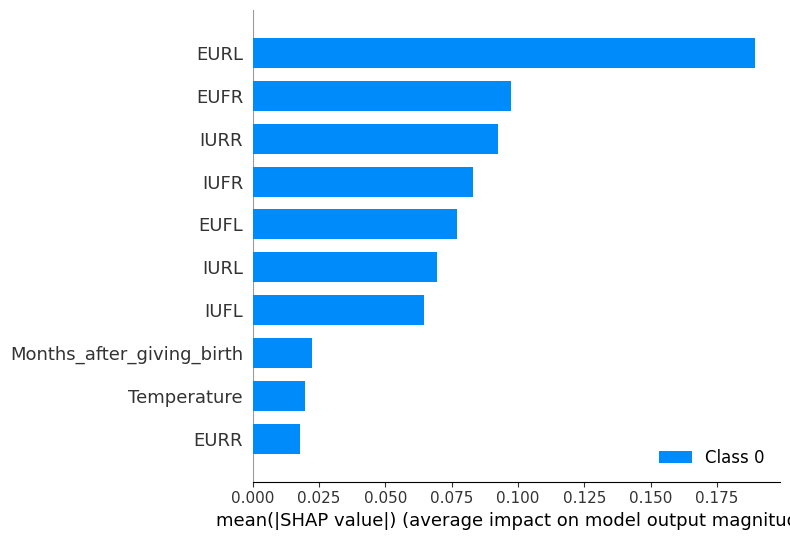

In [15]:
shap.summary_plot(
    shap_values,
    X_test_flat,  # Use the features corresponding to the SHAP values
    feature_names=X_test.columns.tolist()[:15]  # Ensure the feature names list is correctly aligned
)

In [16]:
shap.plots.force(explainer.expected_value,shap_values[0],feature_names=X_test.columns.tolist())

In [17]:
shap_values

[array([[-0.01689529, -0.00853969, -0.13527766, -0.01644103, -0.00689024,
         -0.09263894,  0.2739164 , -0.12866077, -0.00790972, -0.03873352],
        [ 0.        , -0.07302377,  0.00734454, -0.08330572, -0.10788978,
          0.07726409, -0.1981697 ,  0.09625386,  0.02421632, -0.03385937],
        [ 0.03968307,  0.20614907,  0.23741054, -0.0484833 ,  0.02222751,
         -0.02155902,  0.23802913, -0.07091361,  0.        , -0.04302775],
        [-0.04259429,  0.0376033 ,  0.05448653,  0.12862662,  0.32754509,
          0.06732652, -0.05093701,  0.04804055,  0.        ,  0.        ],
        [ 0.02785553, -0.08608373,  0.        , -0.11471699, -0.11677735,
          0.07209764, -0.19132463,  0.07992341,  0.03400726,  0.02292054],
        [ 0.02605267,  0.        , -0.10410694,  0.10365639,  0.        ,
         -0.09932802,  0.1552113 , -0.13874559, -0.04176911,  0.        ],
        [-0.00324465, -0.03913034,  0.        , -0.08622208, -0.10031386,
          0.05651388, -0.2173278

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

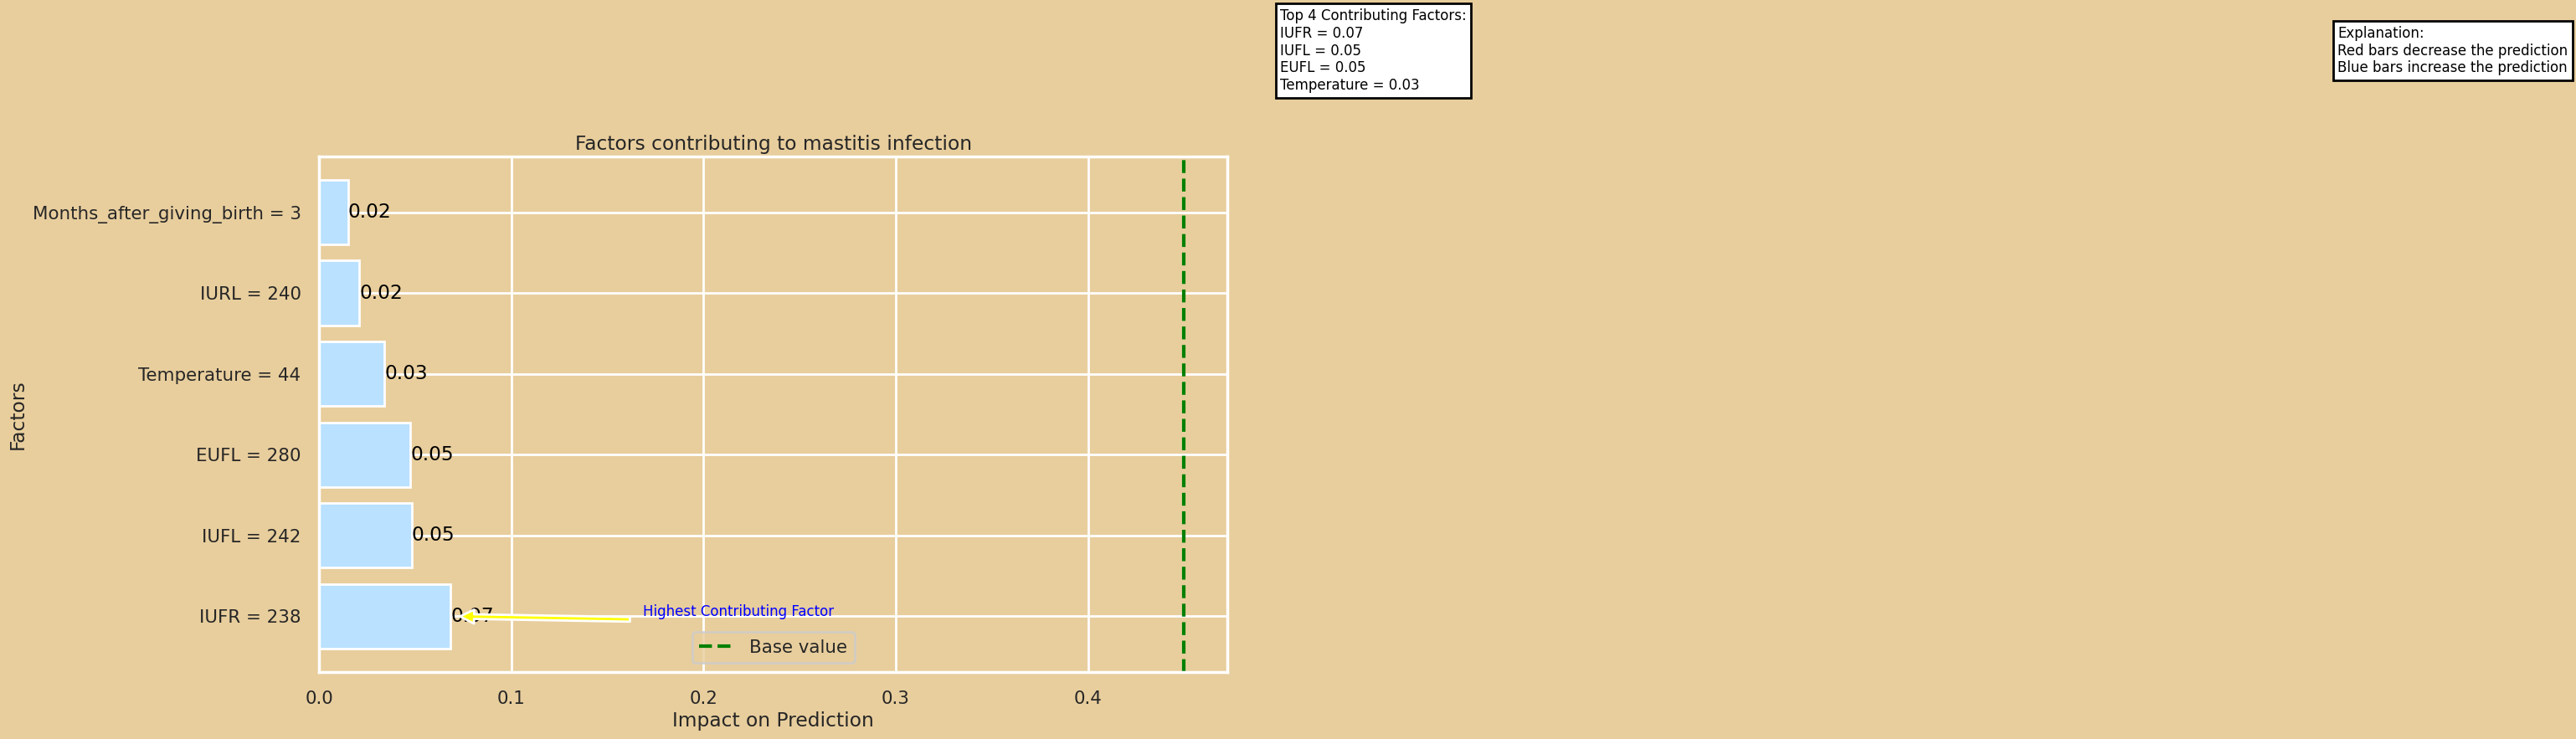

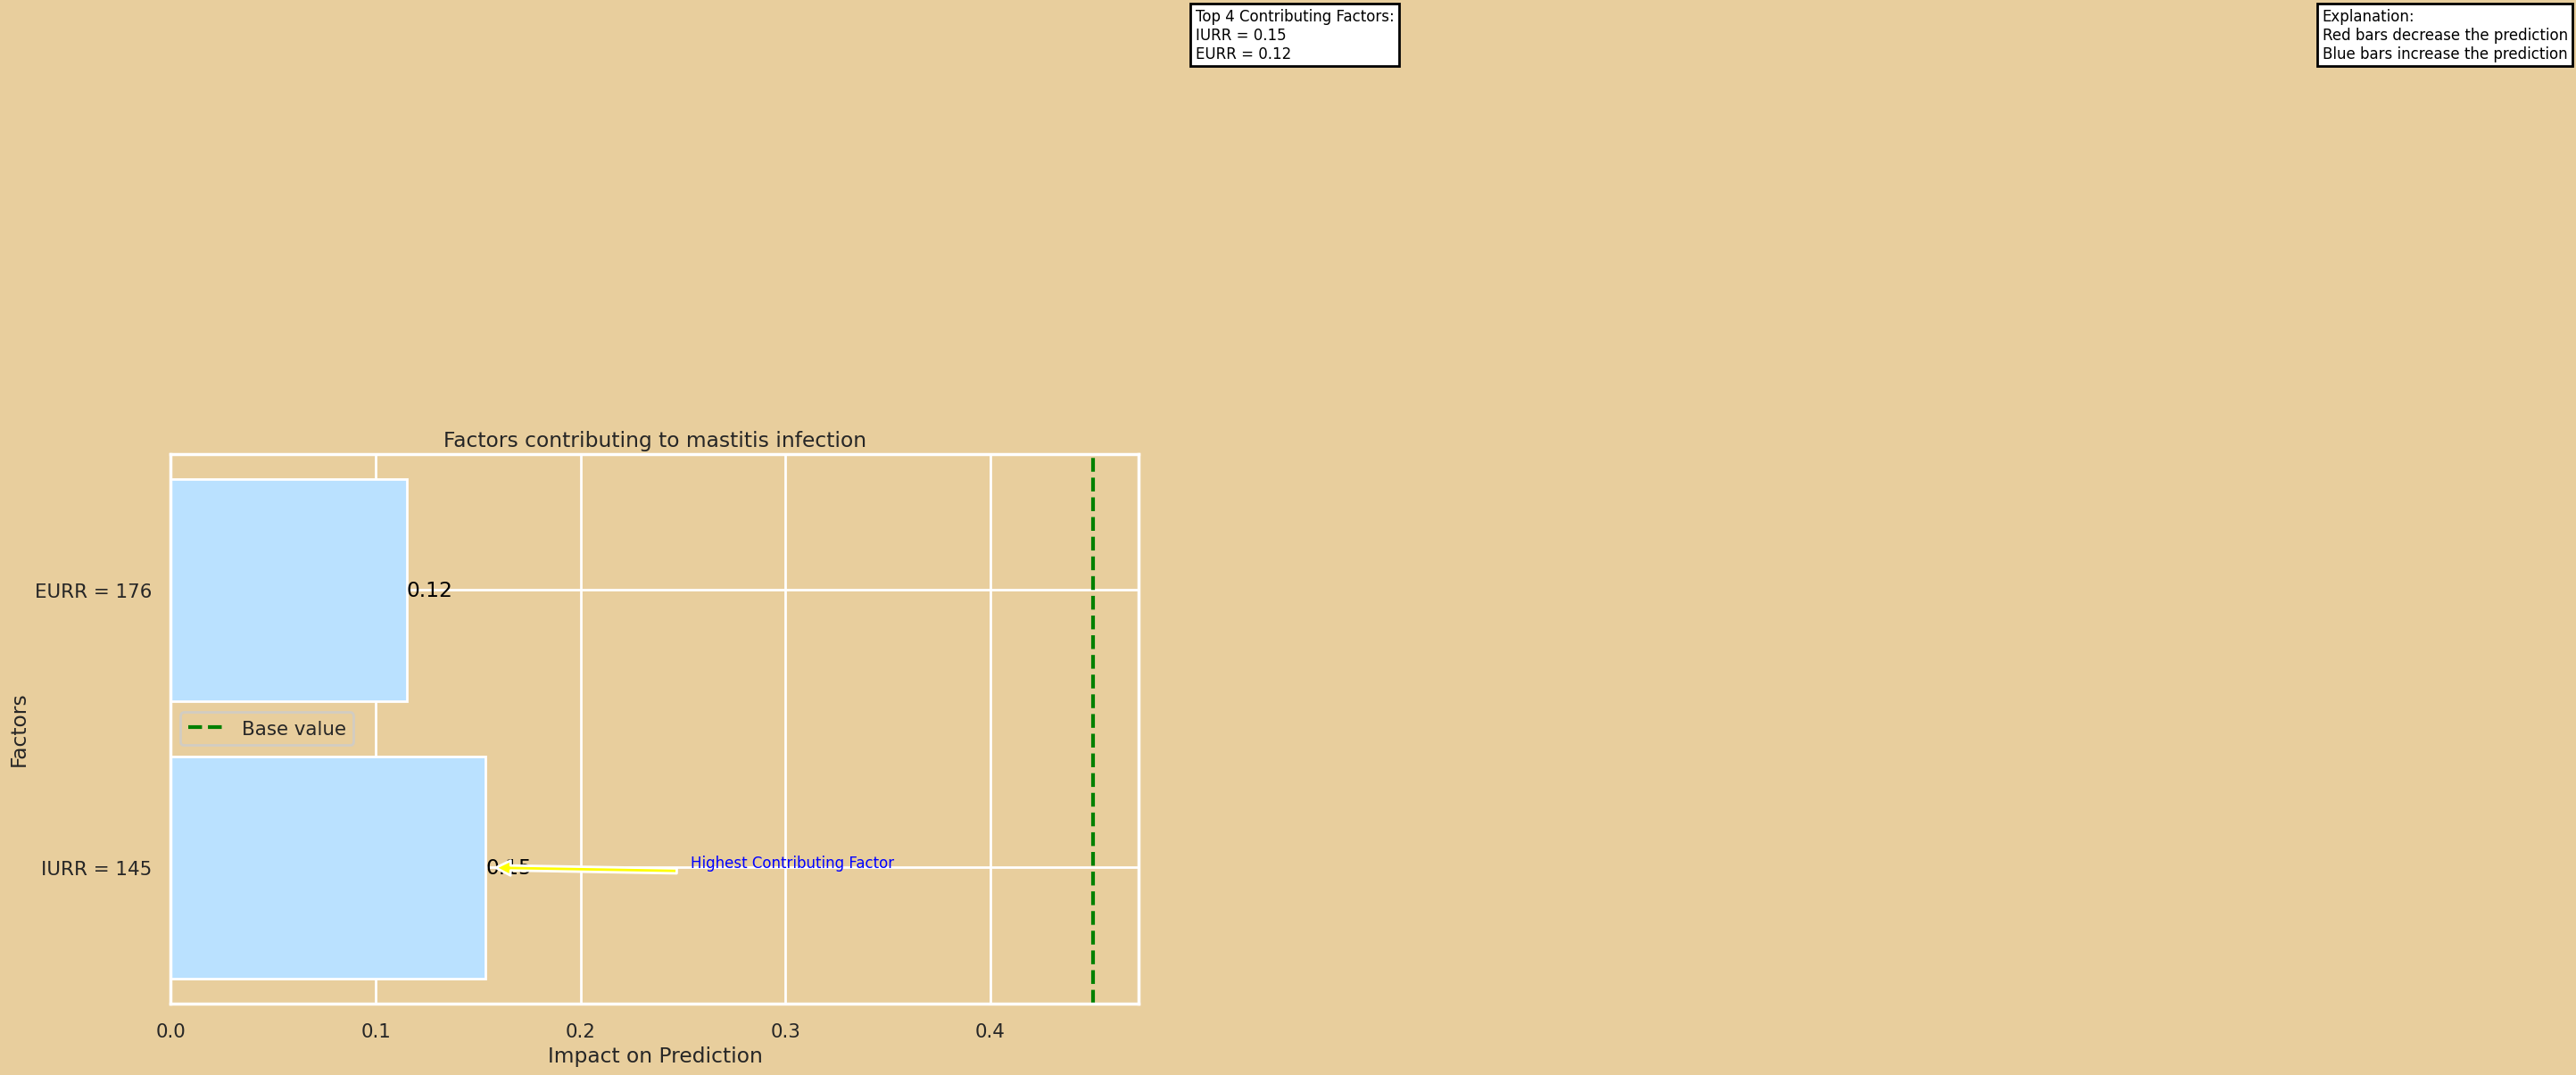

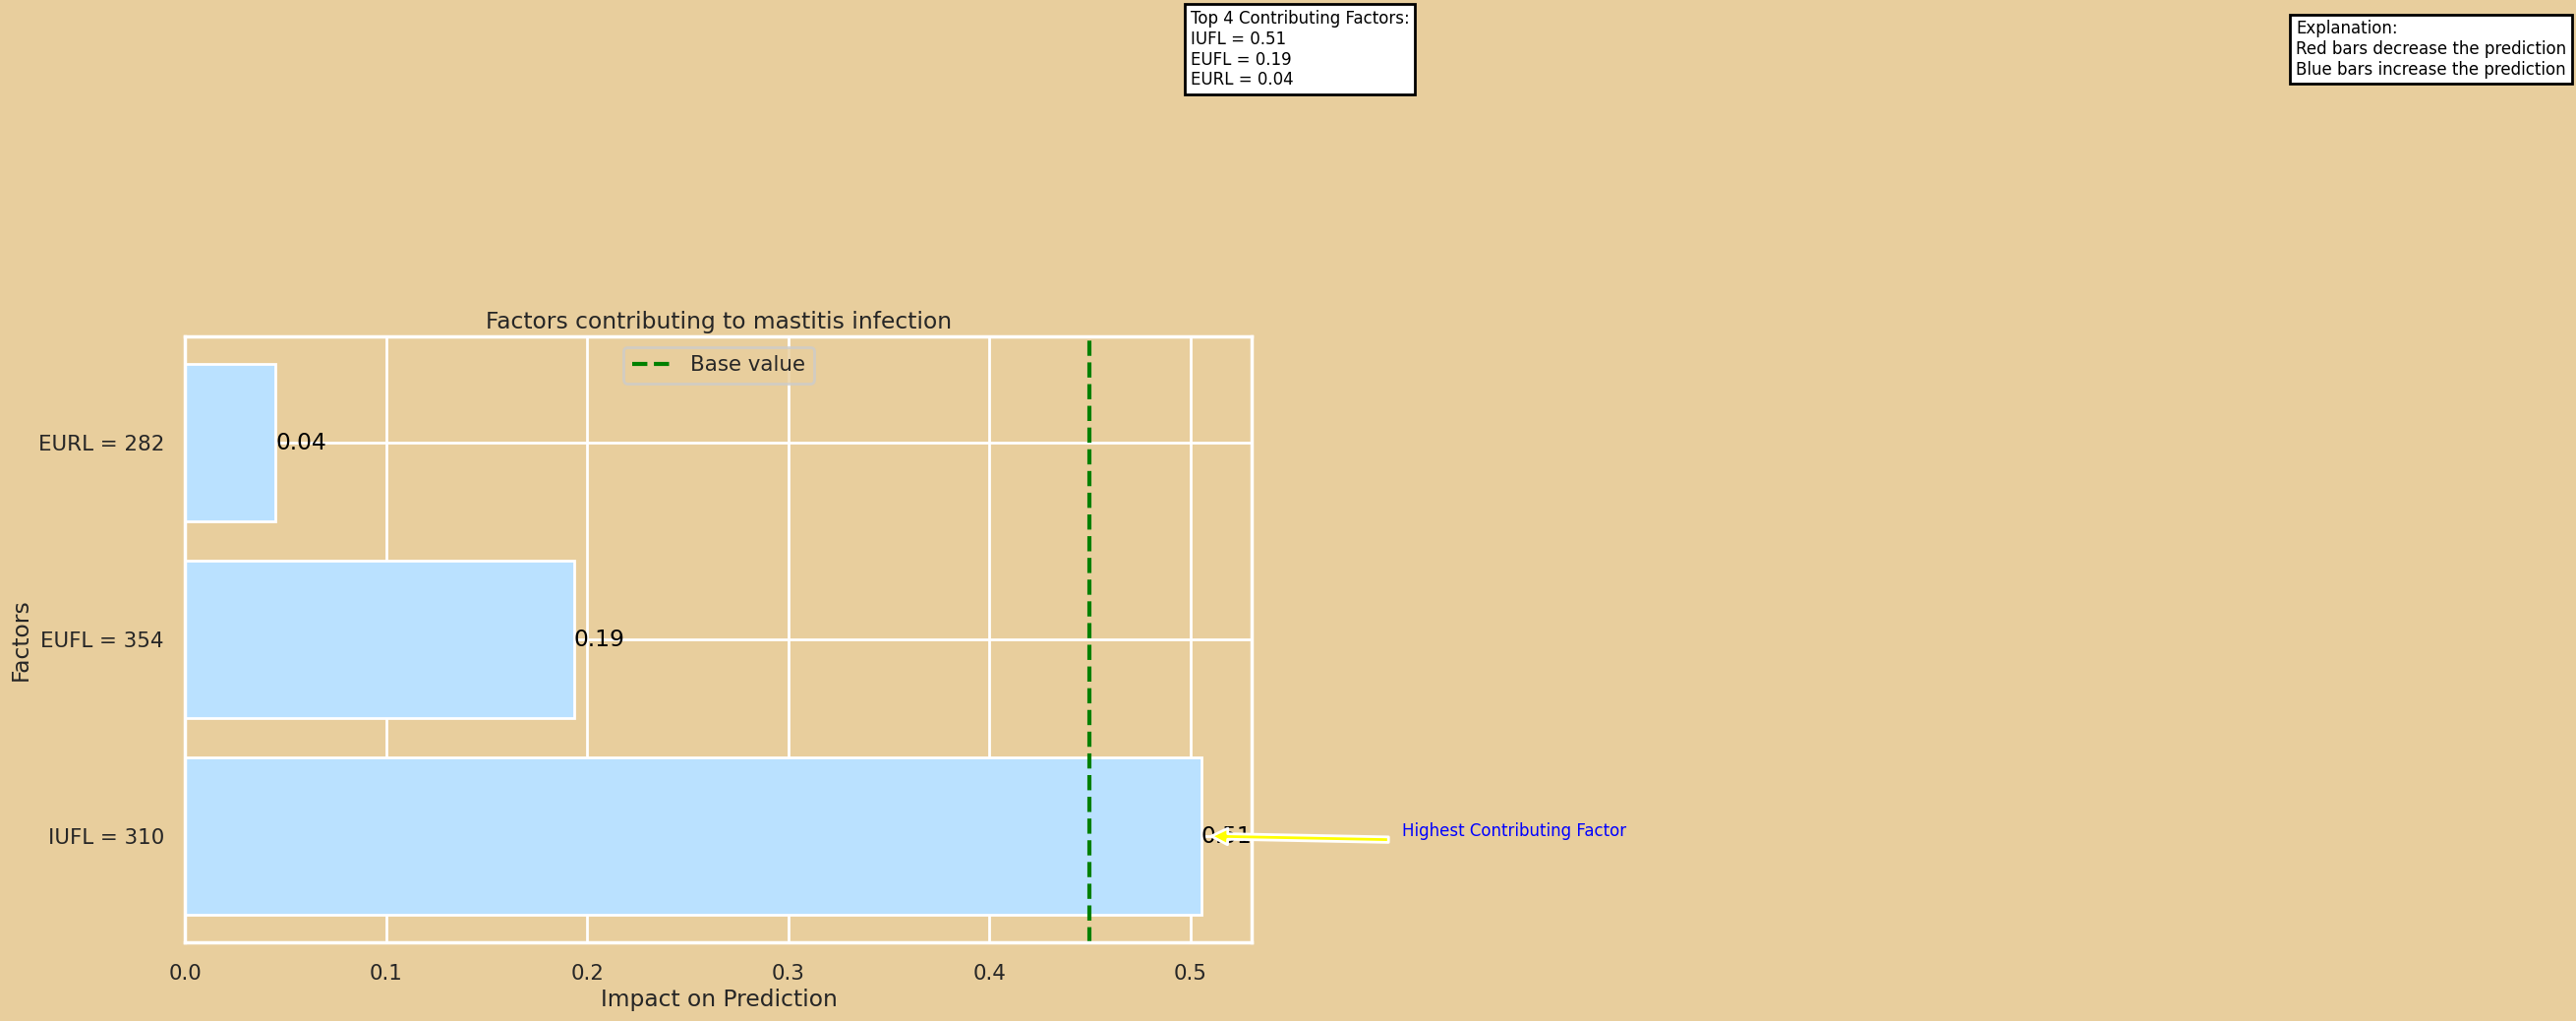

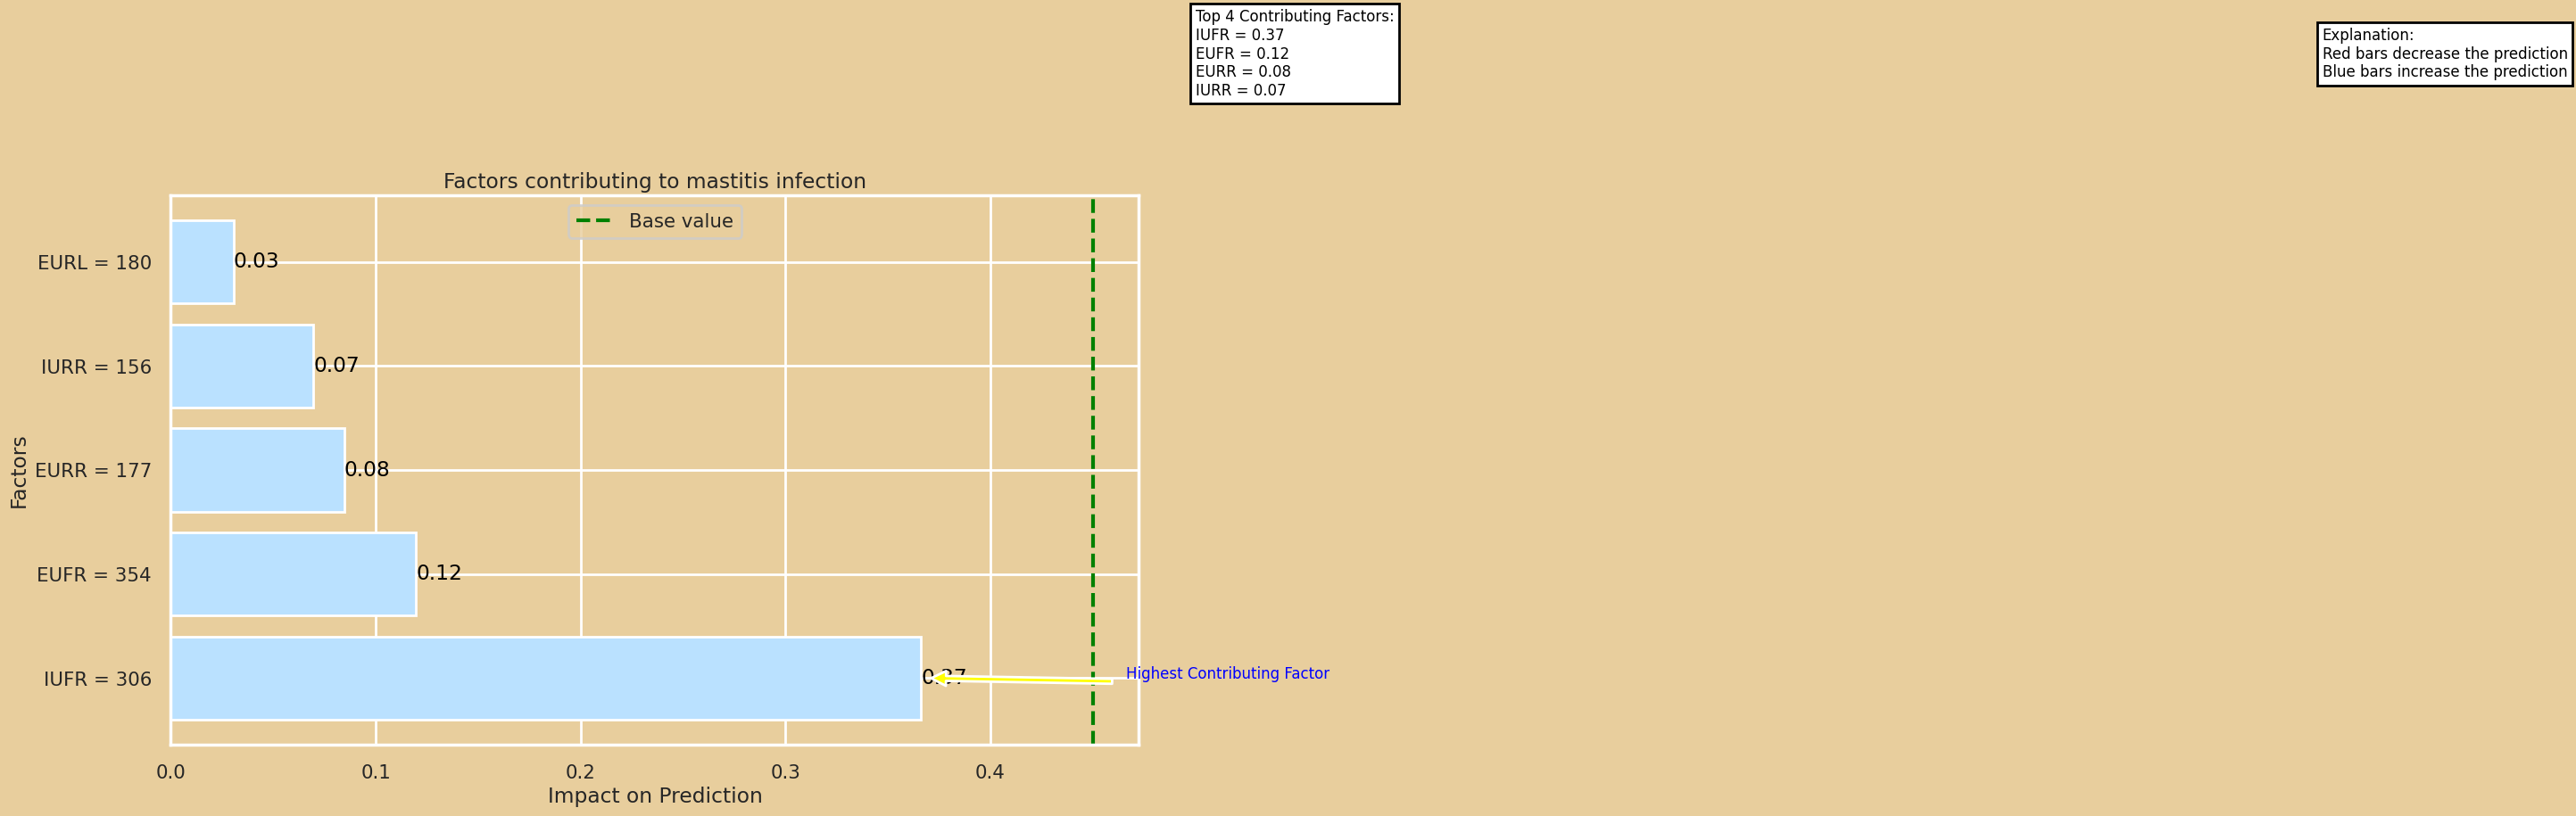

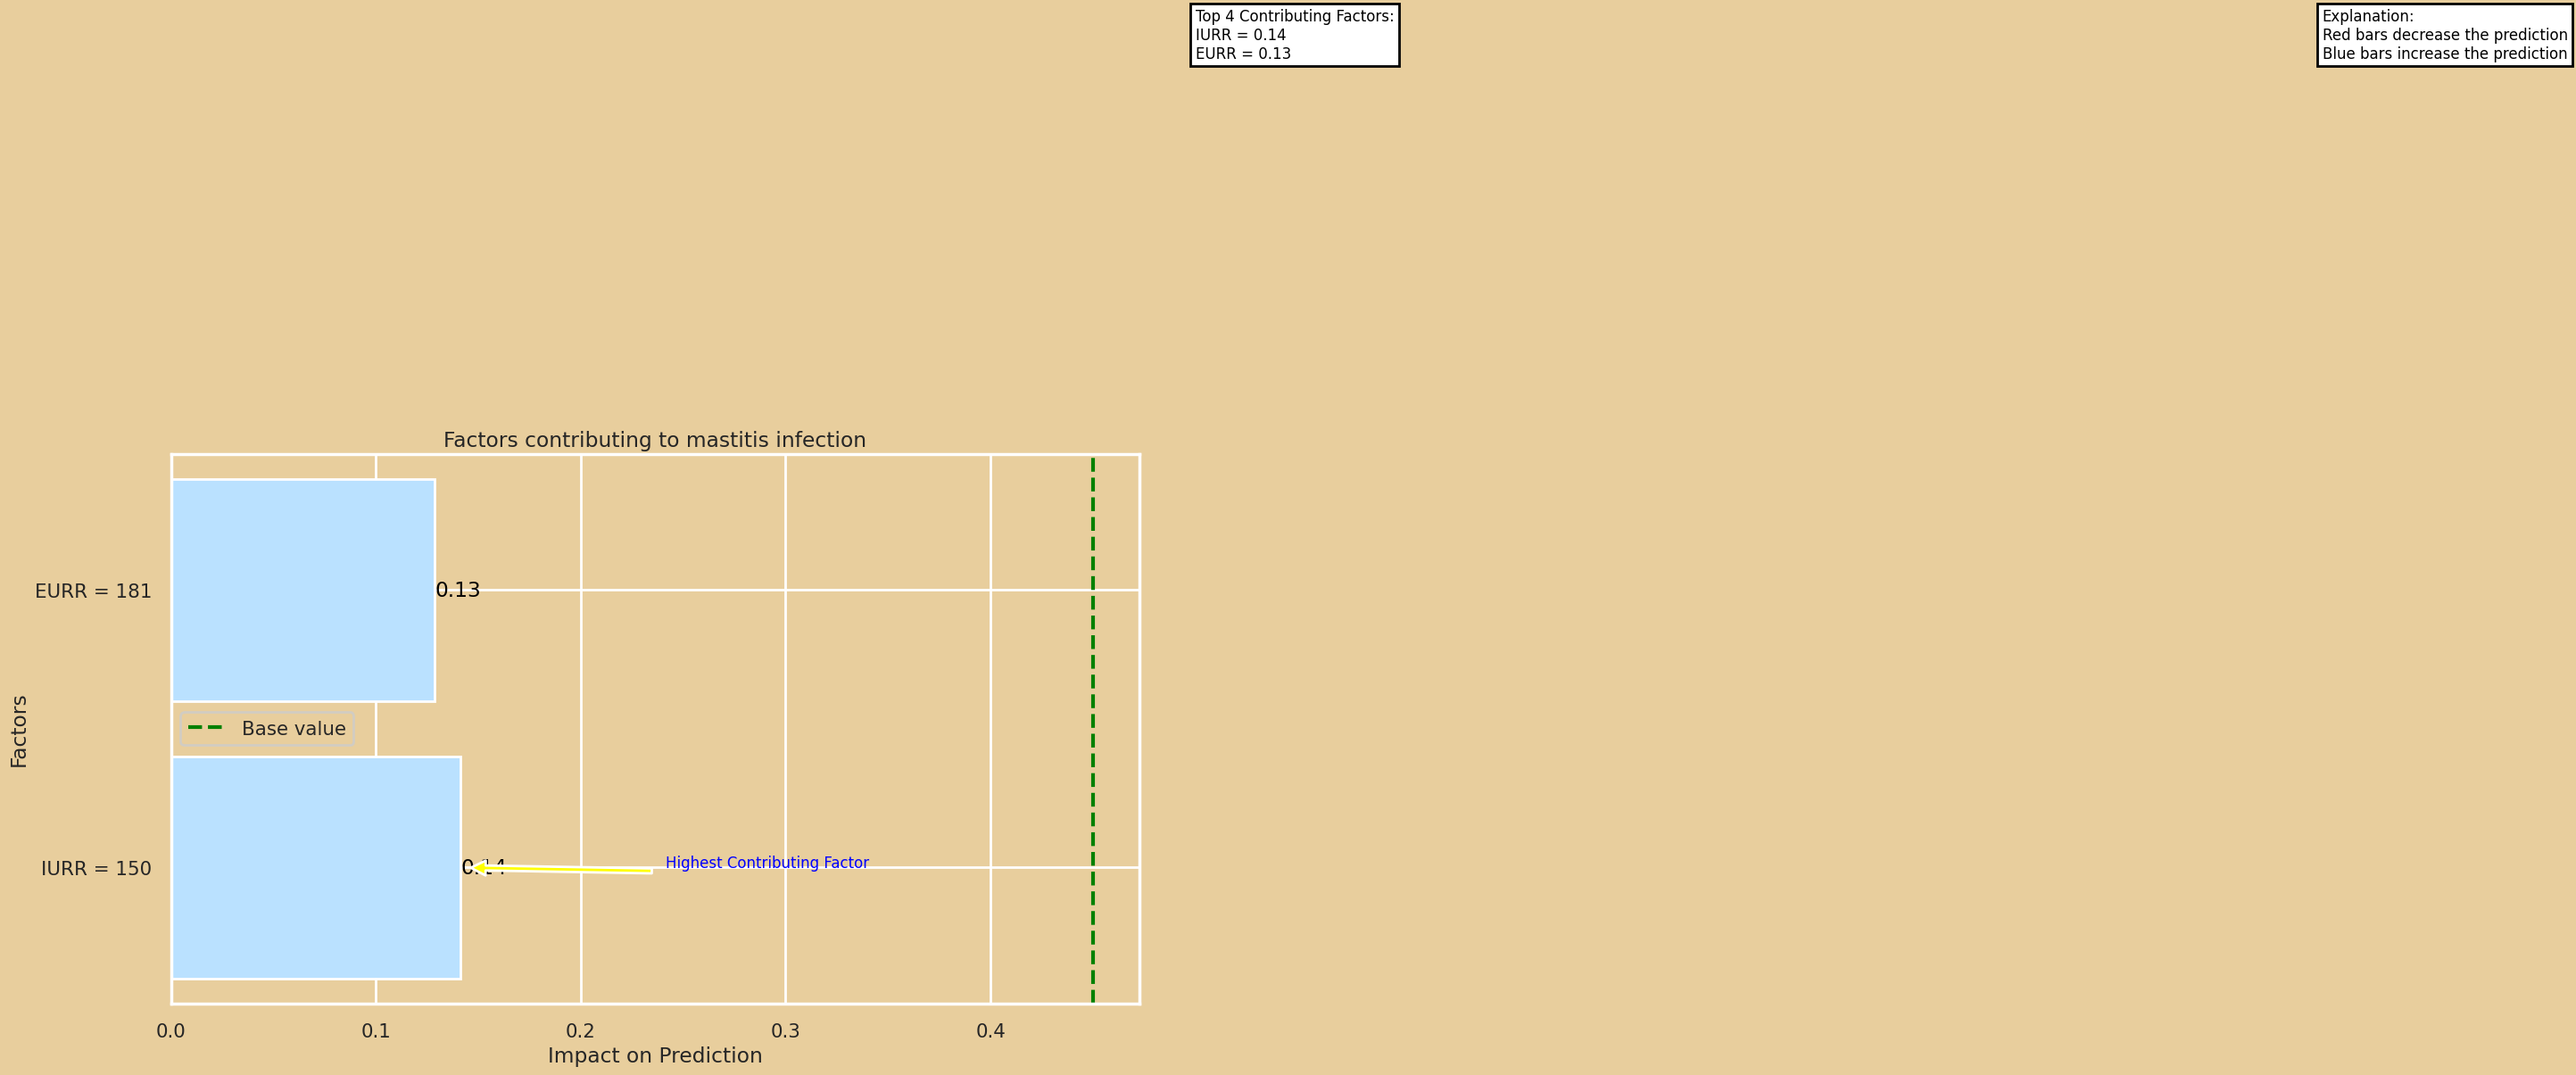

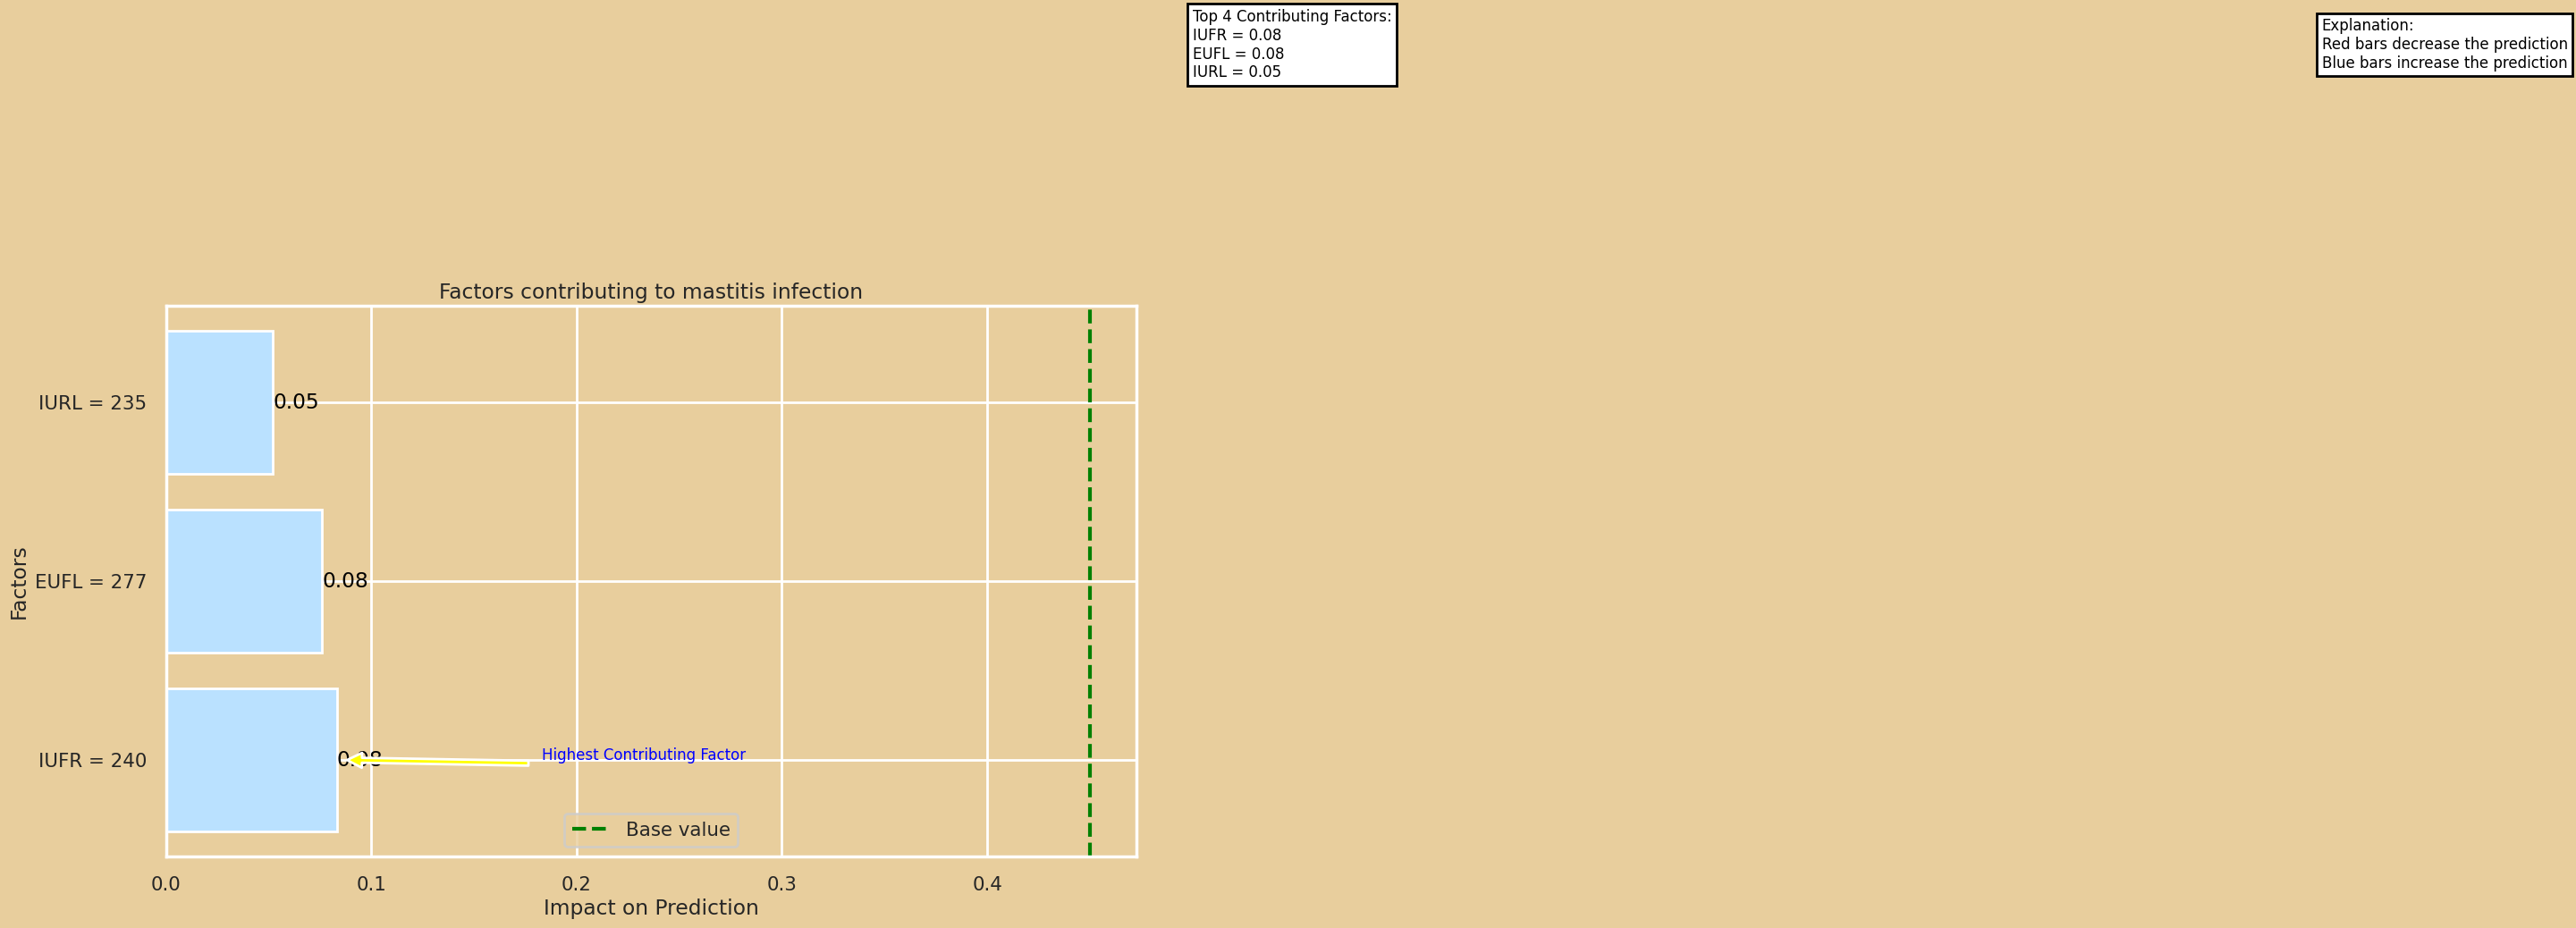

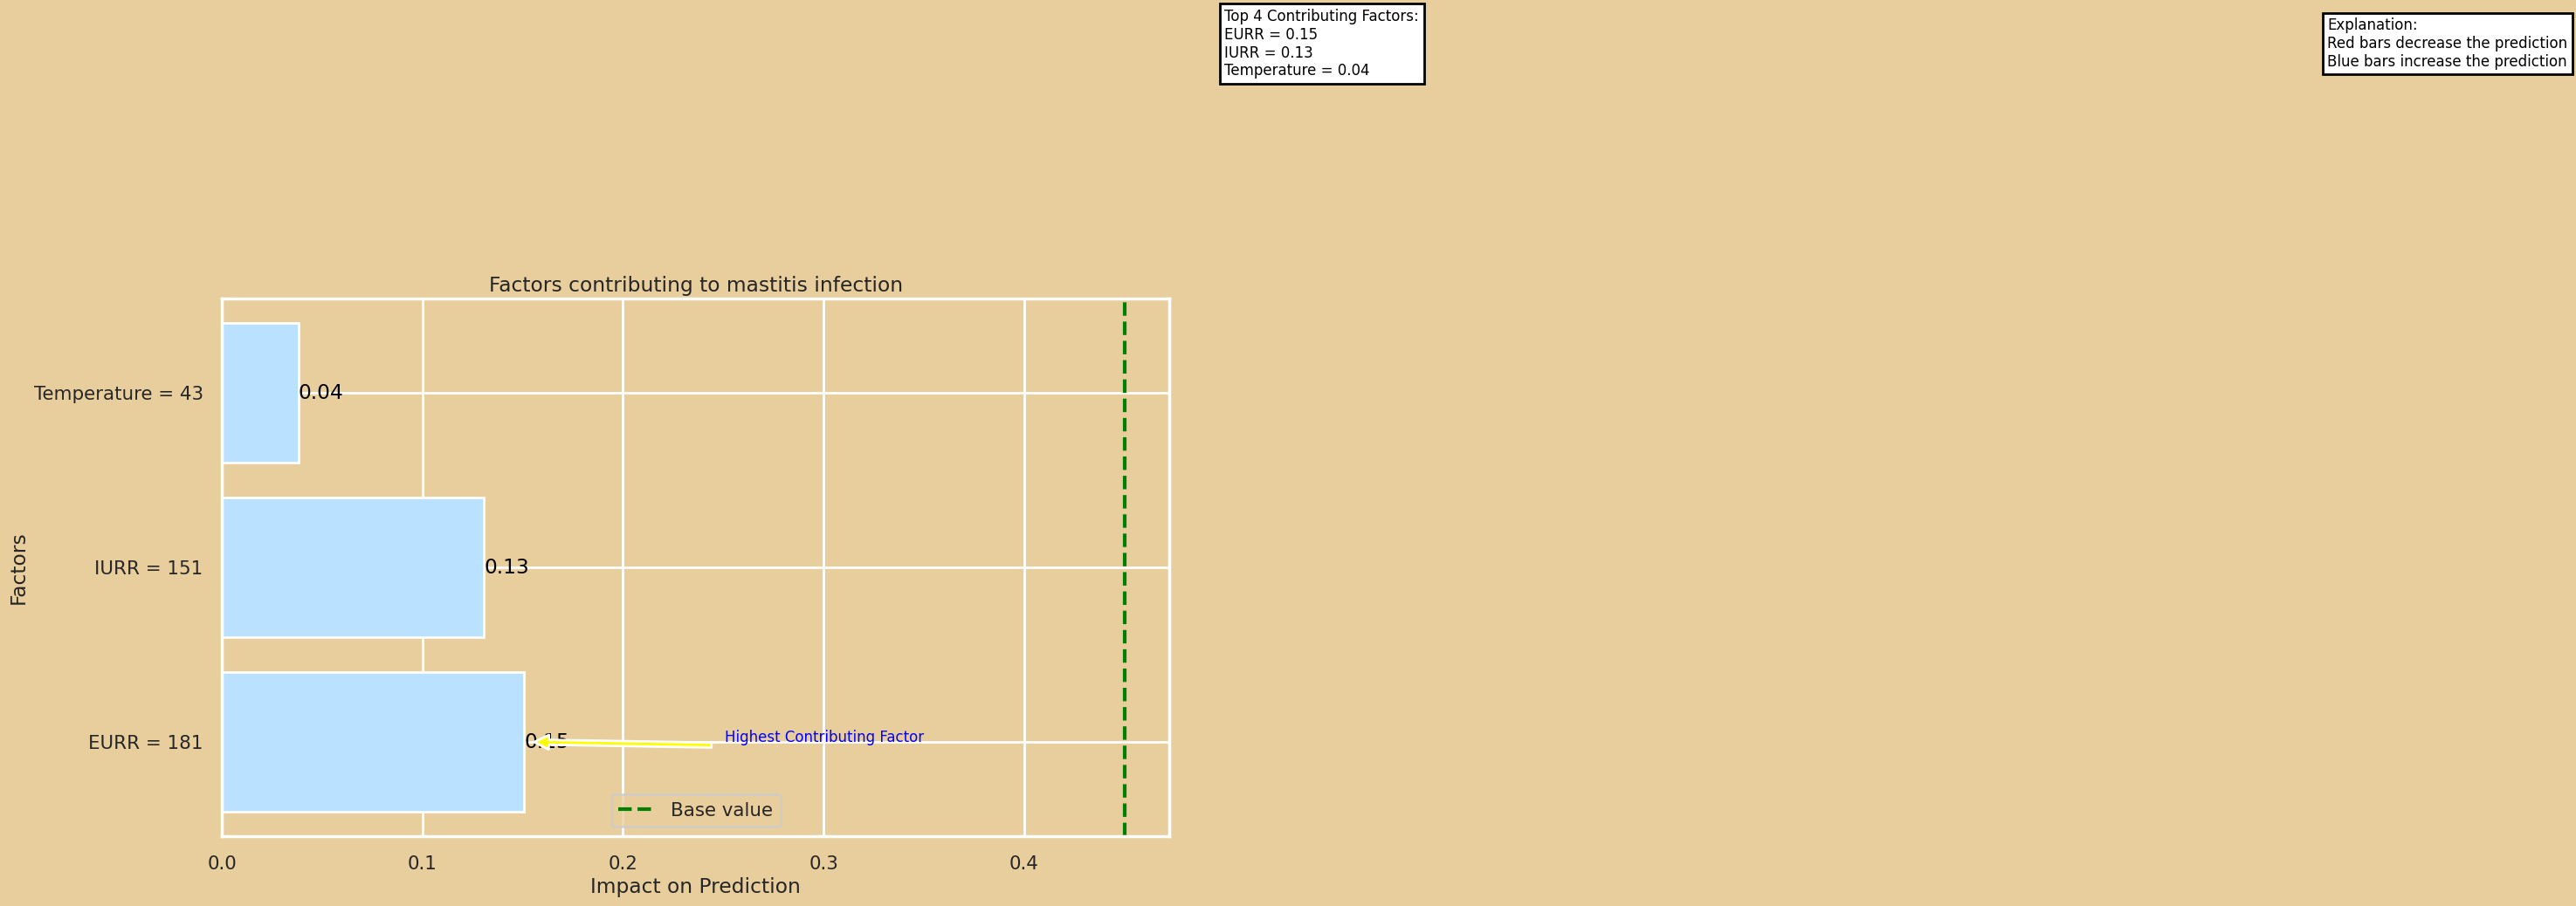

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shap_values(shap_values, feature_names, data, base_value):
    for i in range(shap_values.shape[0]):
        shap_val = shap_values[i]
        feature_vals = data[i]

        # Calculate the final prediction
        final_prediction = base_value + shap_val.sum()

        # Sort features by absolute SHAP value
        sorted_indices = np.argsort(np.abs(shap_val))[::-1]
        sorted_shap_val = shap_val[sorted_indices]
        sorted_feature_vals = feature_vals[sorted_indices]
        sorted_feature_names = np.array(feature_names)[sorted_indices]

        # Only keep positive SHAP values for contributing factors
        positive_indices = sorted_shap_val > 0
        sorted_shap_val = sorted_shap_val[positive_indices]
        sorted_feature_vals = sorted_feature_vals[positive_indices]
        sorted_feature_names = sorted_feature_names[positive_indices]

        # Colors for the bars
        colors = ['#FFB3BA' if val < 0 else '#BAE1FF' for val in sorted_shap_val]
        highlight_colors = ['#FF6666' if val < 0 else '#6699FF' for val in sorted_shap_val]

        # Create the plot
        plt.figure(figsize=(14, 8))
        bars = plt.barh(np.arange(len(sorted_shap_val)), sorted_shap_val, color=colors)

        # Add base value line
        plt.axvline(base_value, color='green', linestyle='--', label='Base value')

        # Add SHAP value annotations
        for bar, val in zip(bars, sorted_shap_val):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', 
                     va='center', ha='left' if val > 0 else 'right', color='black')

        # Add feature value annotations on y-axis
        plt.yticks(np.arange(len(sorted_shap_val)), 
                   [f"{name} = {value}" for name, value in zip(sorted_feature_names, sorted_feature_vals)])

        # Explanation text
        plt.text(1.05, len(sorted_shap_val) + 1, 'Explanation:\nRed bars decrease the prediction\nBlue bars increase the prediction',
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Highlight the highest contributing factor
        max_shap_value = max(sorted_shap_val, key=abs)
        max_feature_index = np.argmax(sorted_shap_val == max_shap_value)
        plt.annotate('Highest Contributing Factor',
                     xy=(max_shap_value, max_feature_index),
                     xytext=(max_shap_value + 0.1, max_feature_index),
                     arrowprops=dict(facecolor='yellow', shrink=0.05),
                     fontsize=12, color='blue', ha='left')

        # Add the final prediction as an annotation
       #plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', va='center', ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

        # Add top contributing factors
        top_contributors = "\n".join([f"{name} = {value:.2f}" for name, value in zip(sorted_feature_names[:4], sorted_shap_val[:4])])
        plt.text(0.5, len(sorted_shap_val) + 1, f'Top 4 Contributing Factors:\n{top_contributors}', 
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Set labels and title
        plt.xlabel('Impact on Prediction')
        plt.ylabel('Factors')
        plt.title('Factors contributing to mastitis infection')
        plt.legend()
        plt.show()

# Example data from your SHAP values
shap_values = np.array([[ 0.01510528,  0.04828333,  0.04745795,  0.0683805 ,  0.        ,
          0.02094104, -0.04792082, -0.22217445, -0.19293541,  0.03399702],
        [ 0.        , -0.1430172 , -0.10096483, -0.16180499, -0.06112457,
         -0.03054825,  0.        ,  0.15355836,  0.11505941,  0.        ],
        [ 0.        ,  0.50547092,  0.19335936,  0.        , -0.02350016,
          0.        ,  0.04487755, -0.08090614, -0.08359505,  0.        ],
        [-0.00980605, -0.03035921, -0.02442409,  0.36607249,  0.11960096,
         -0.01752507,  0.03068465,  0.06951556,  0.08468532,  0.        ],
        [ 0.        , -0.11724626, -0.13015154, -0.17281645, -0.04606187,
         -0.0326407 ,  0.        ,  0.14133451,  0.12875644,  0.        ],
        [ 0.        , -0.01008916,  0.07596273,  0.08320058, -0.0021842 ,
          0.05207373,  0.        , -0.20697299, -0.22077895,  0.        ],
        [-0.00714737, -0.14060008, -0.10025933, -0.20892108, -0.03242361,
         -0.05902739,  0.        ,  0.13062481,  0.15073893,  0.03818581]])
# Feature names from your data
feature_names = X_test.columns.tolist()

# Corresponding feature values for the examples
data = X_test_flat

# Base value for SHAP calculations (example)
base_value = 0.45

plot_shap_values(shap_values, feature_names, data, base_value)

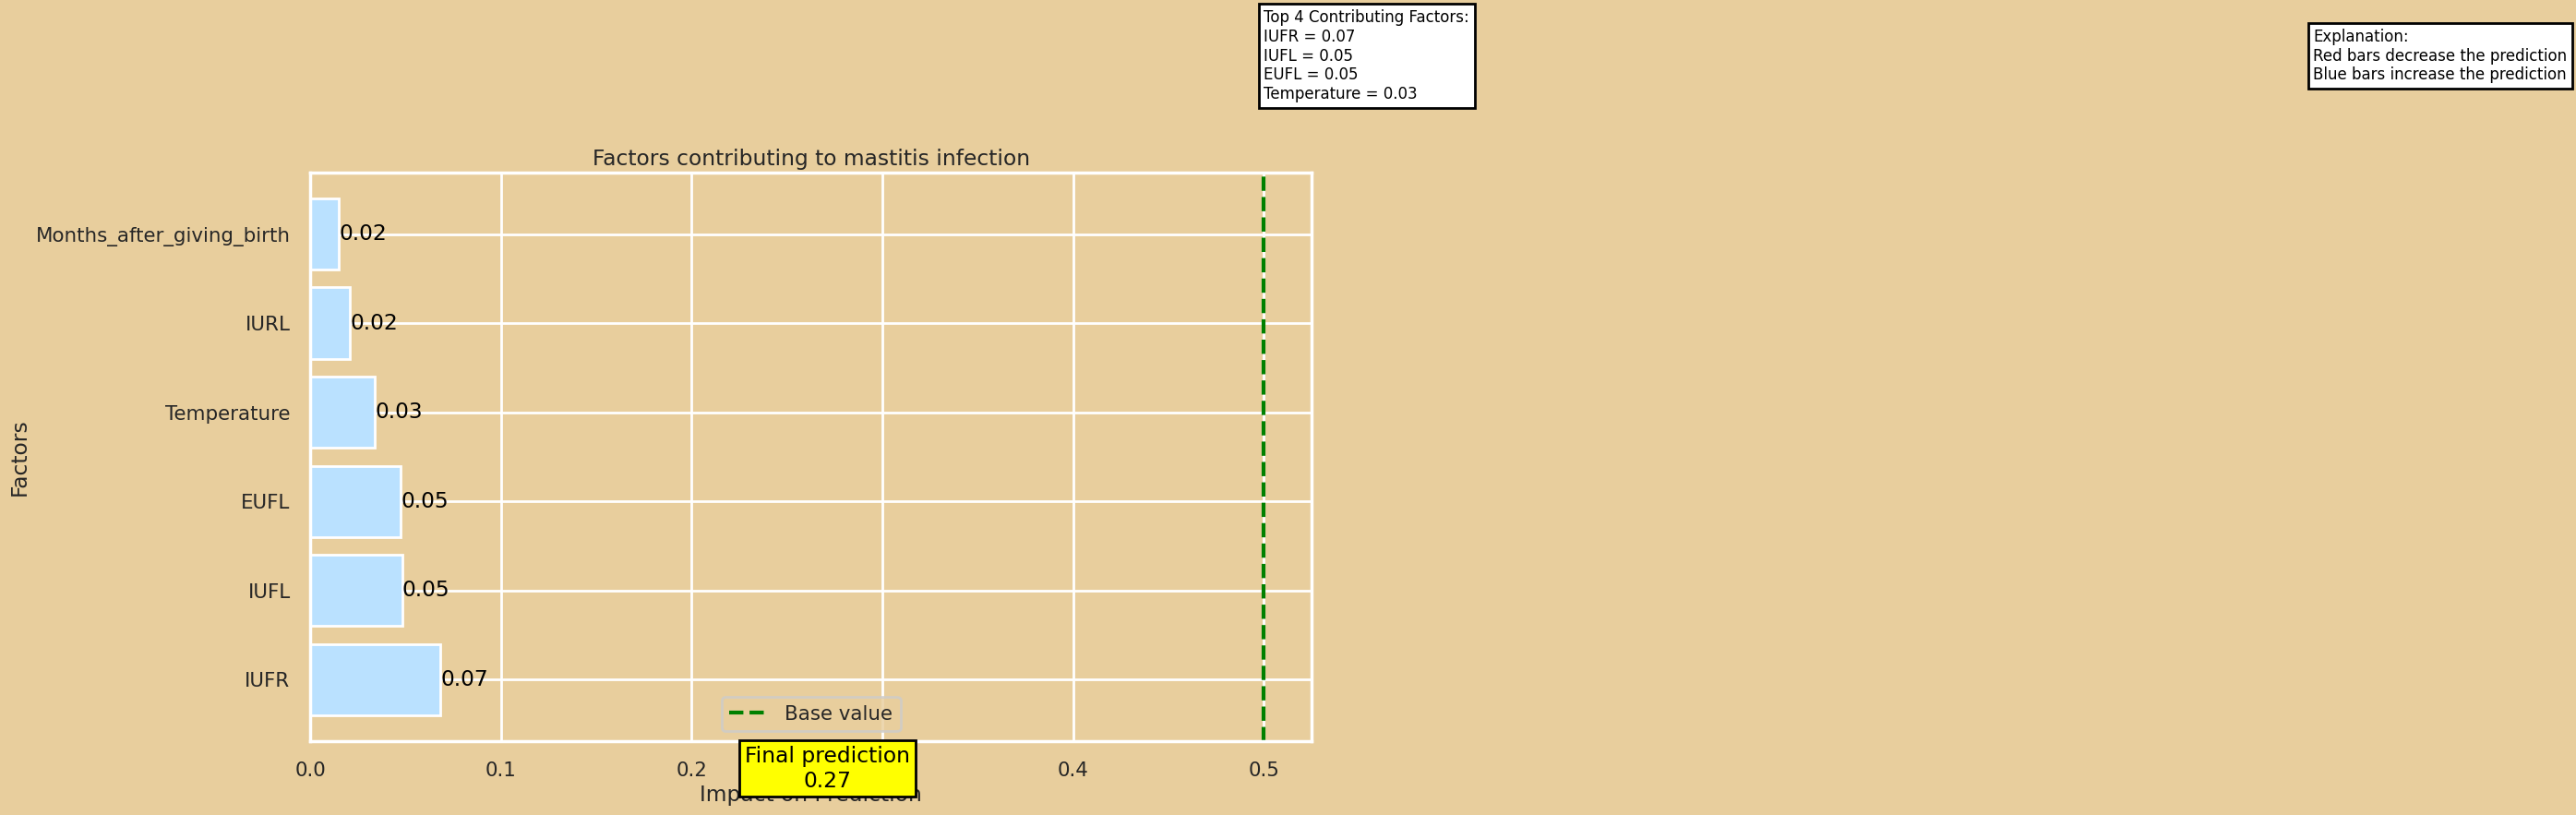

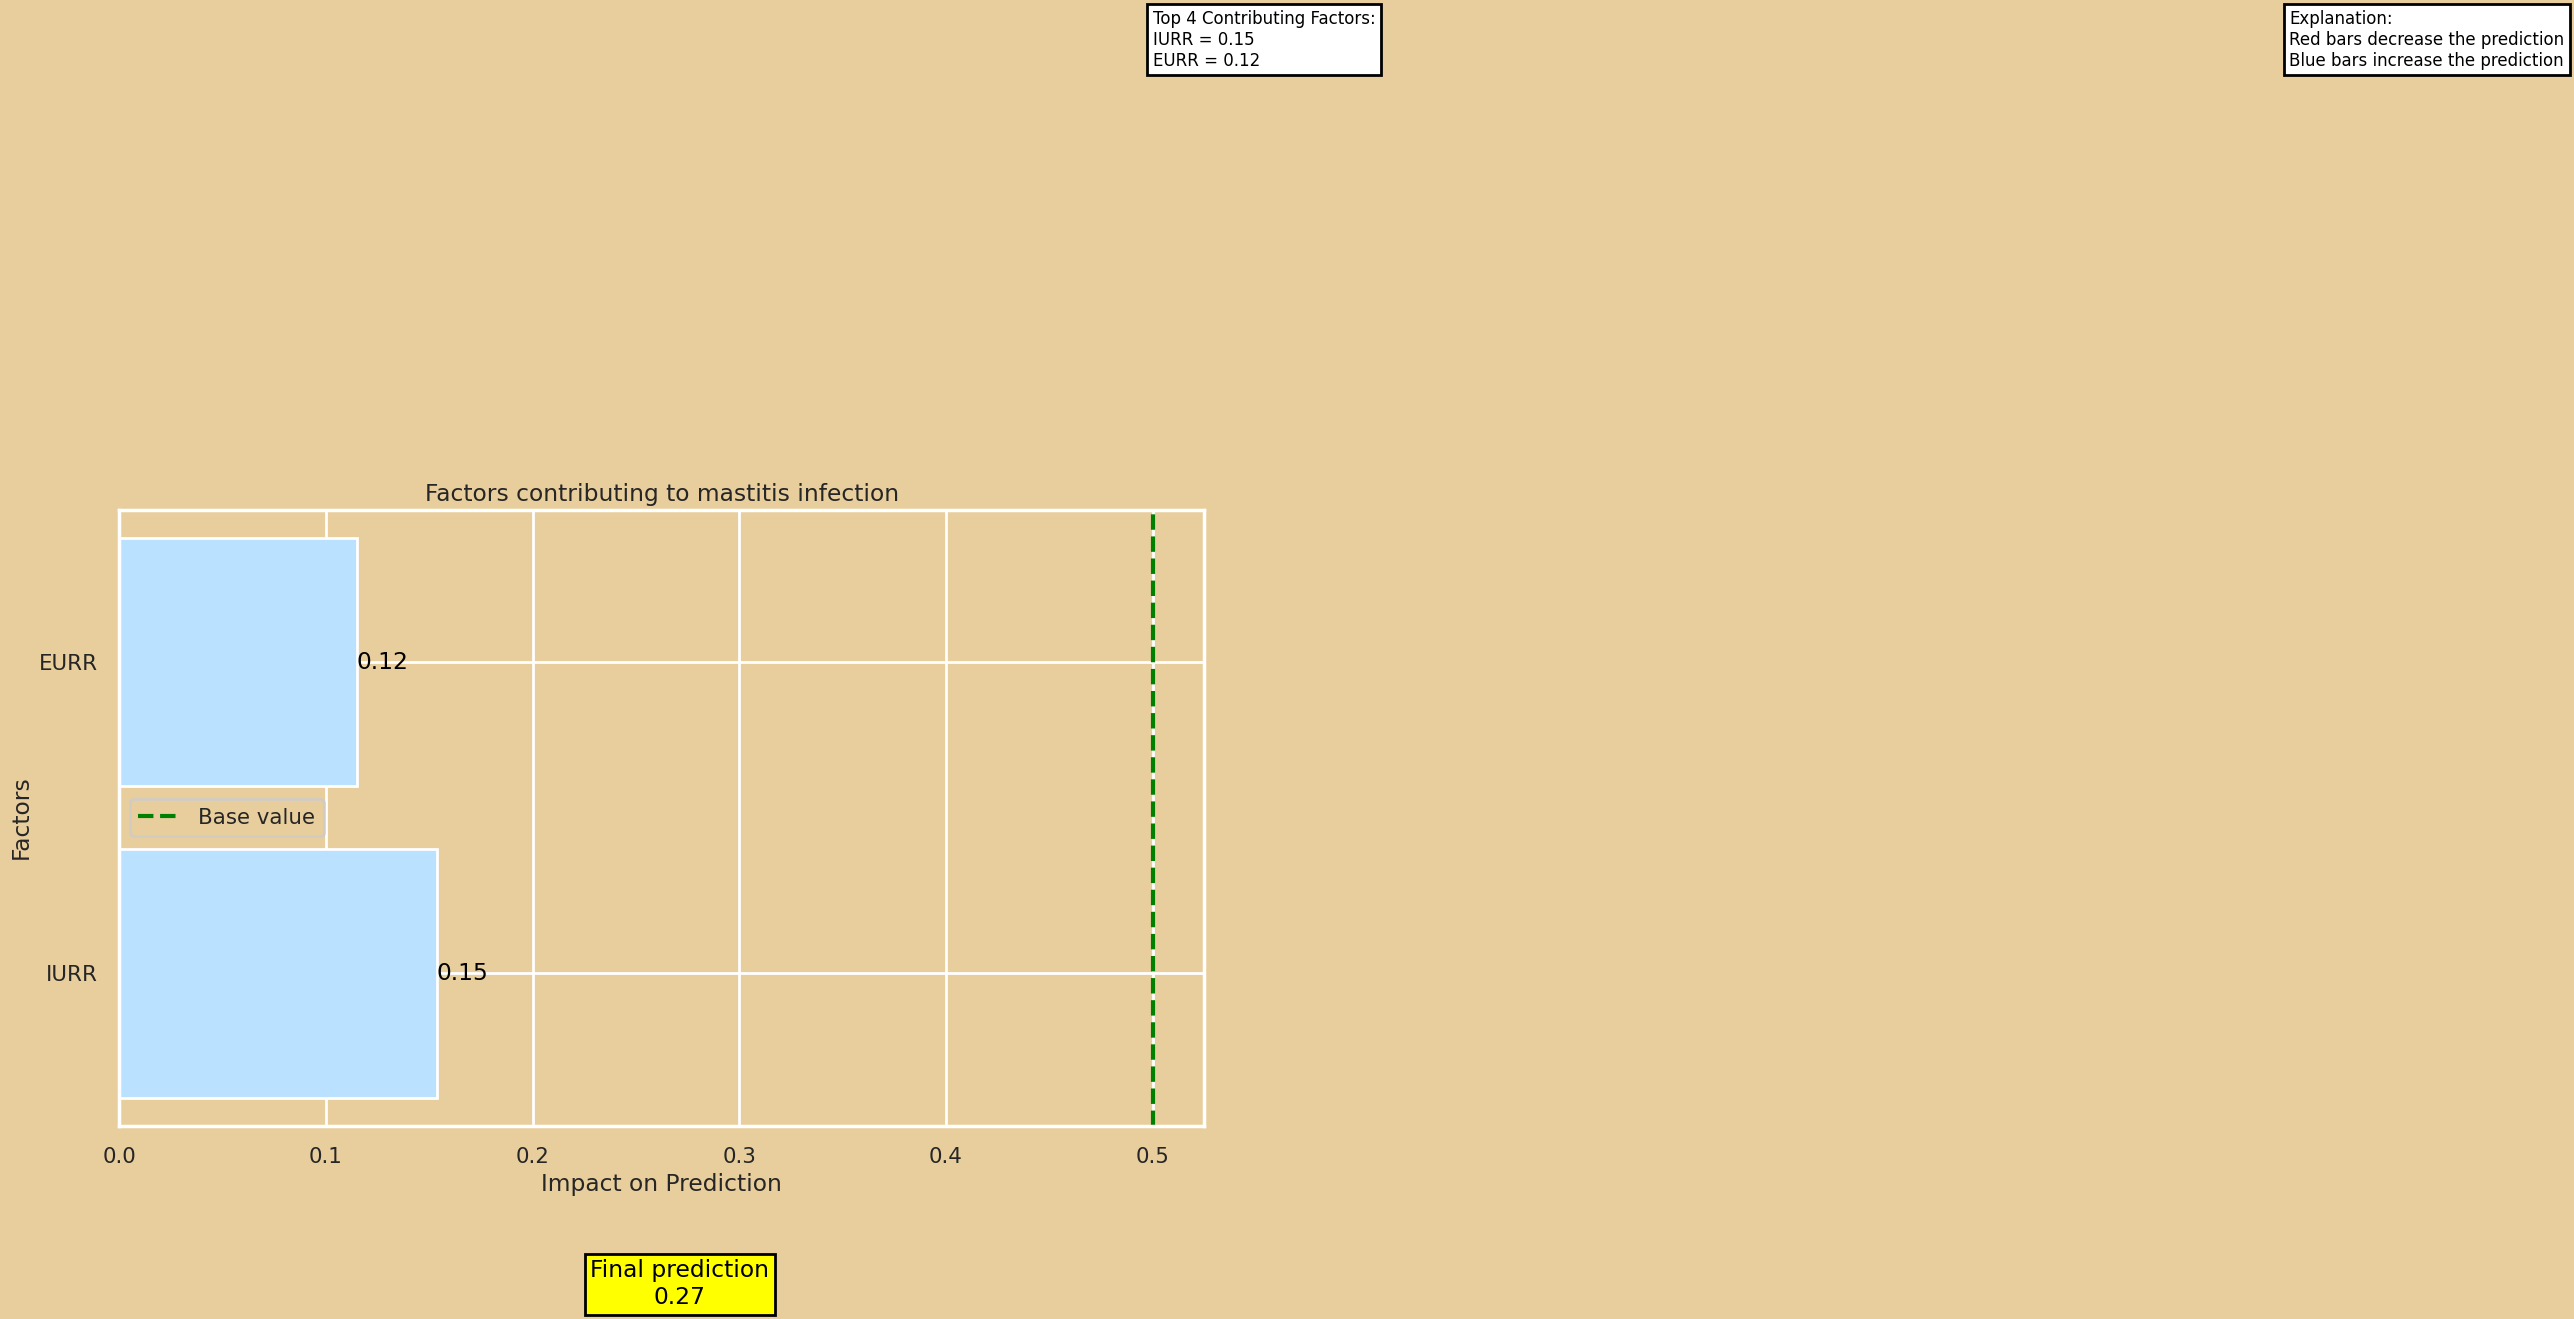

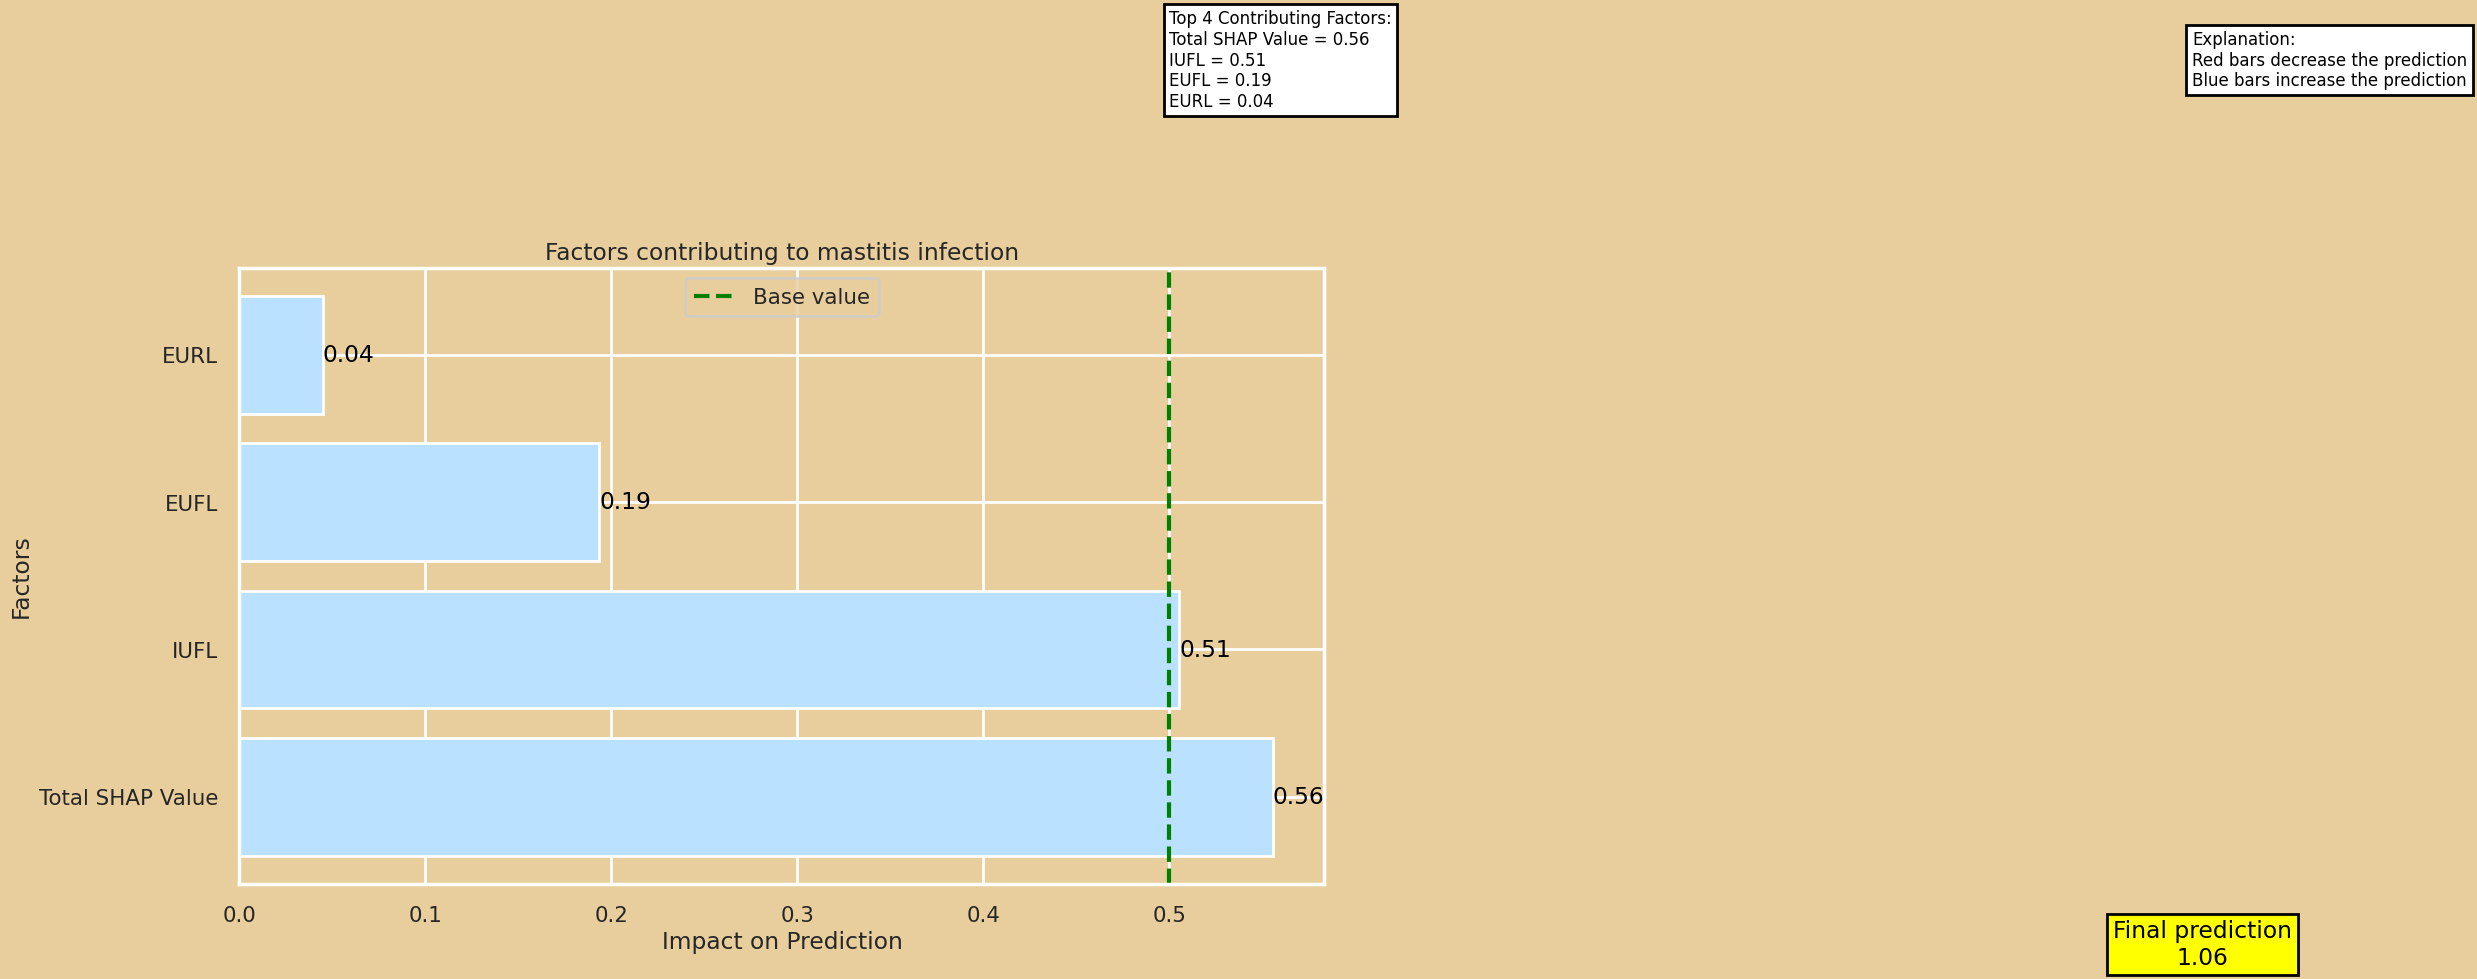

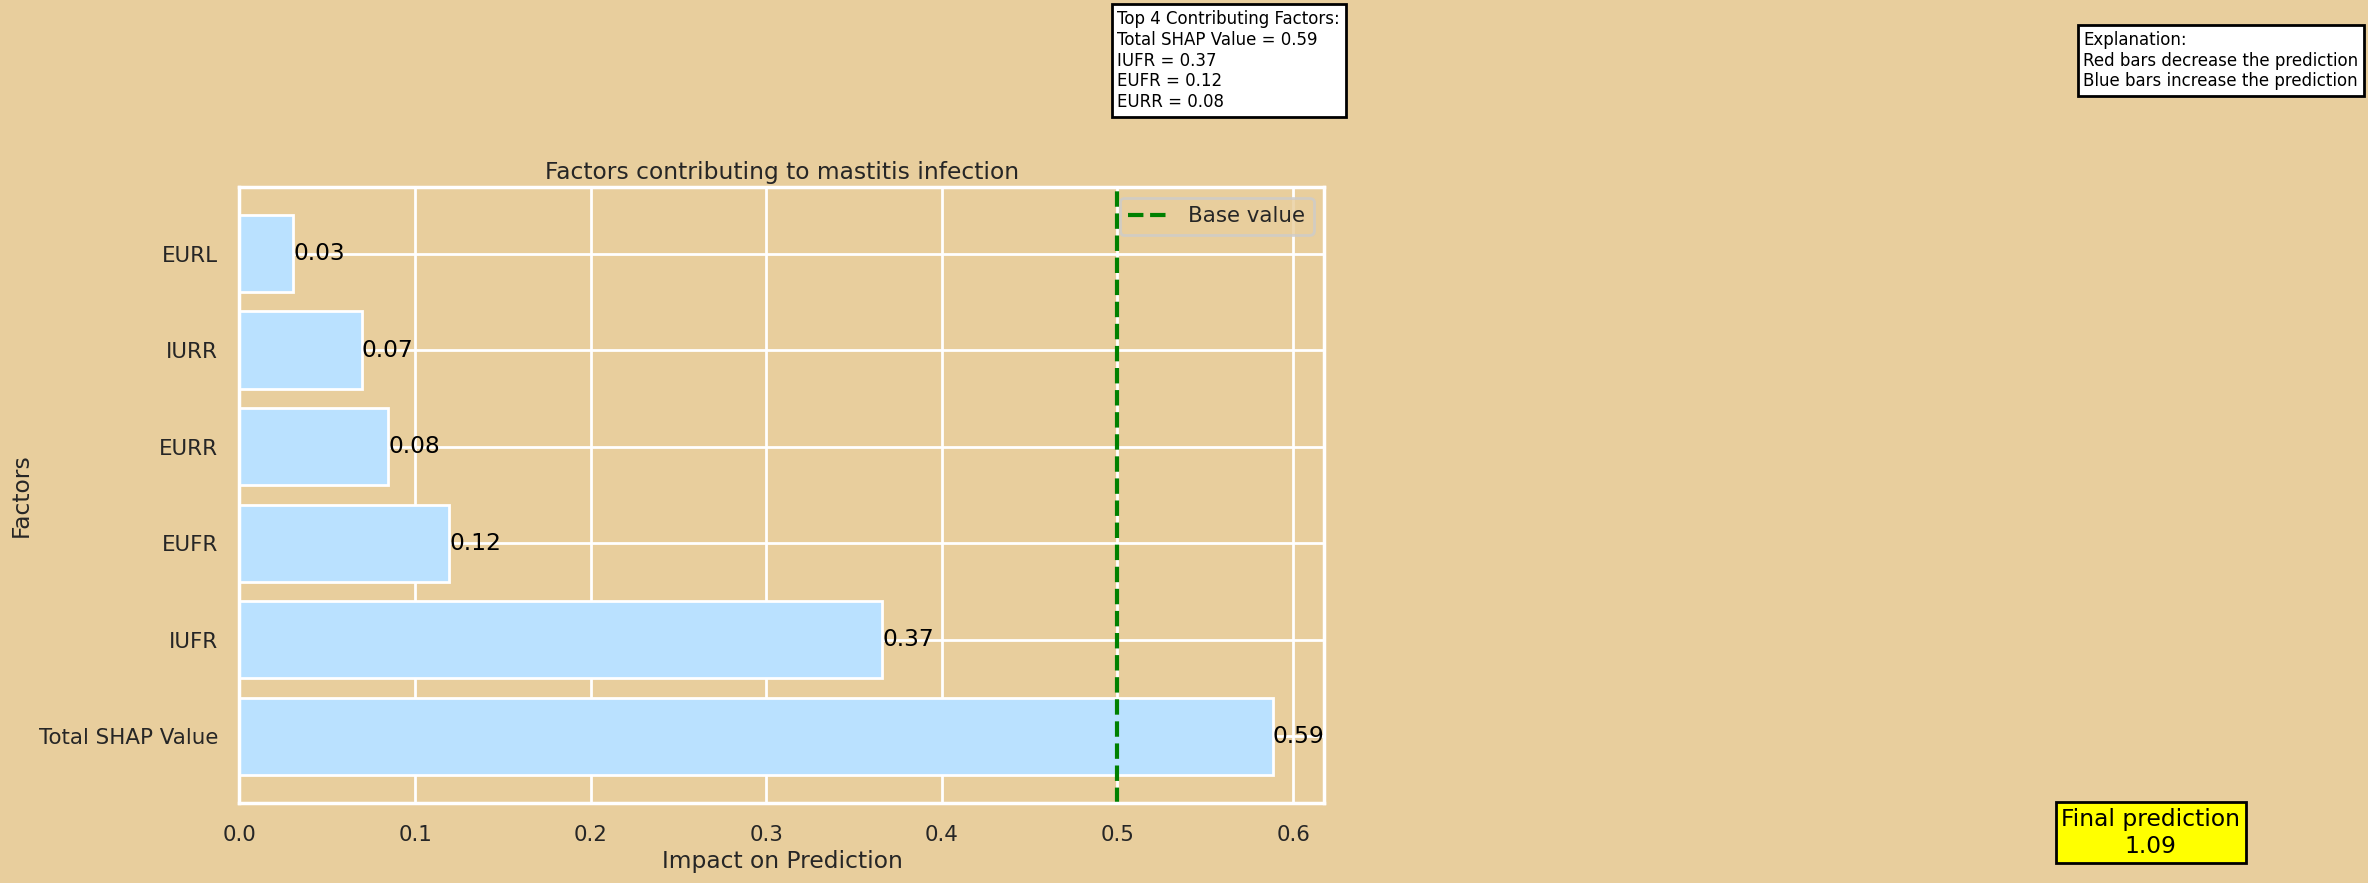

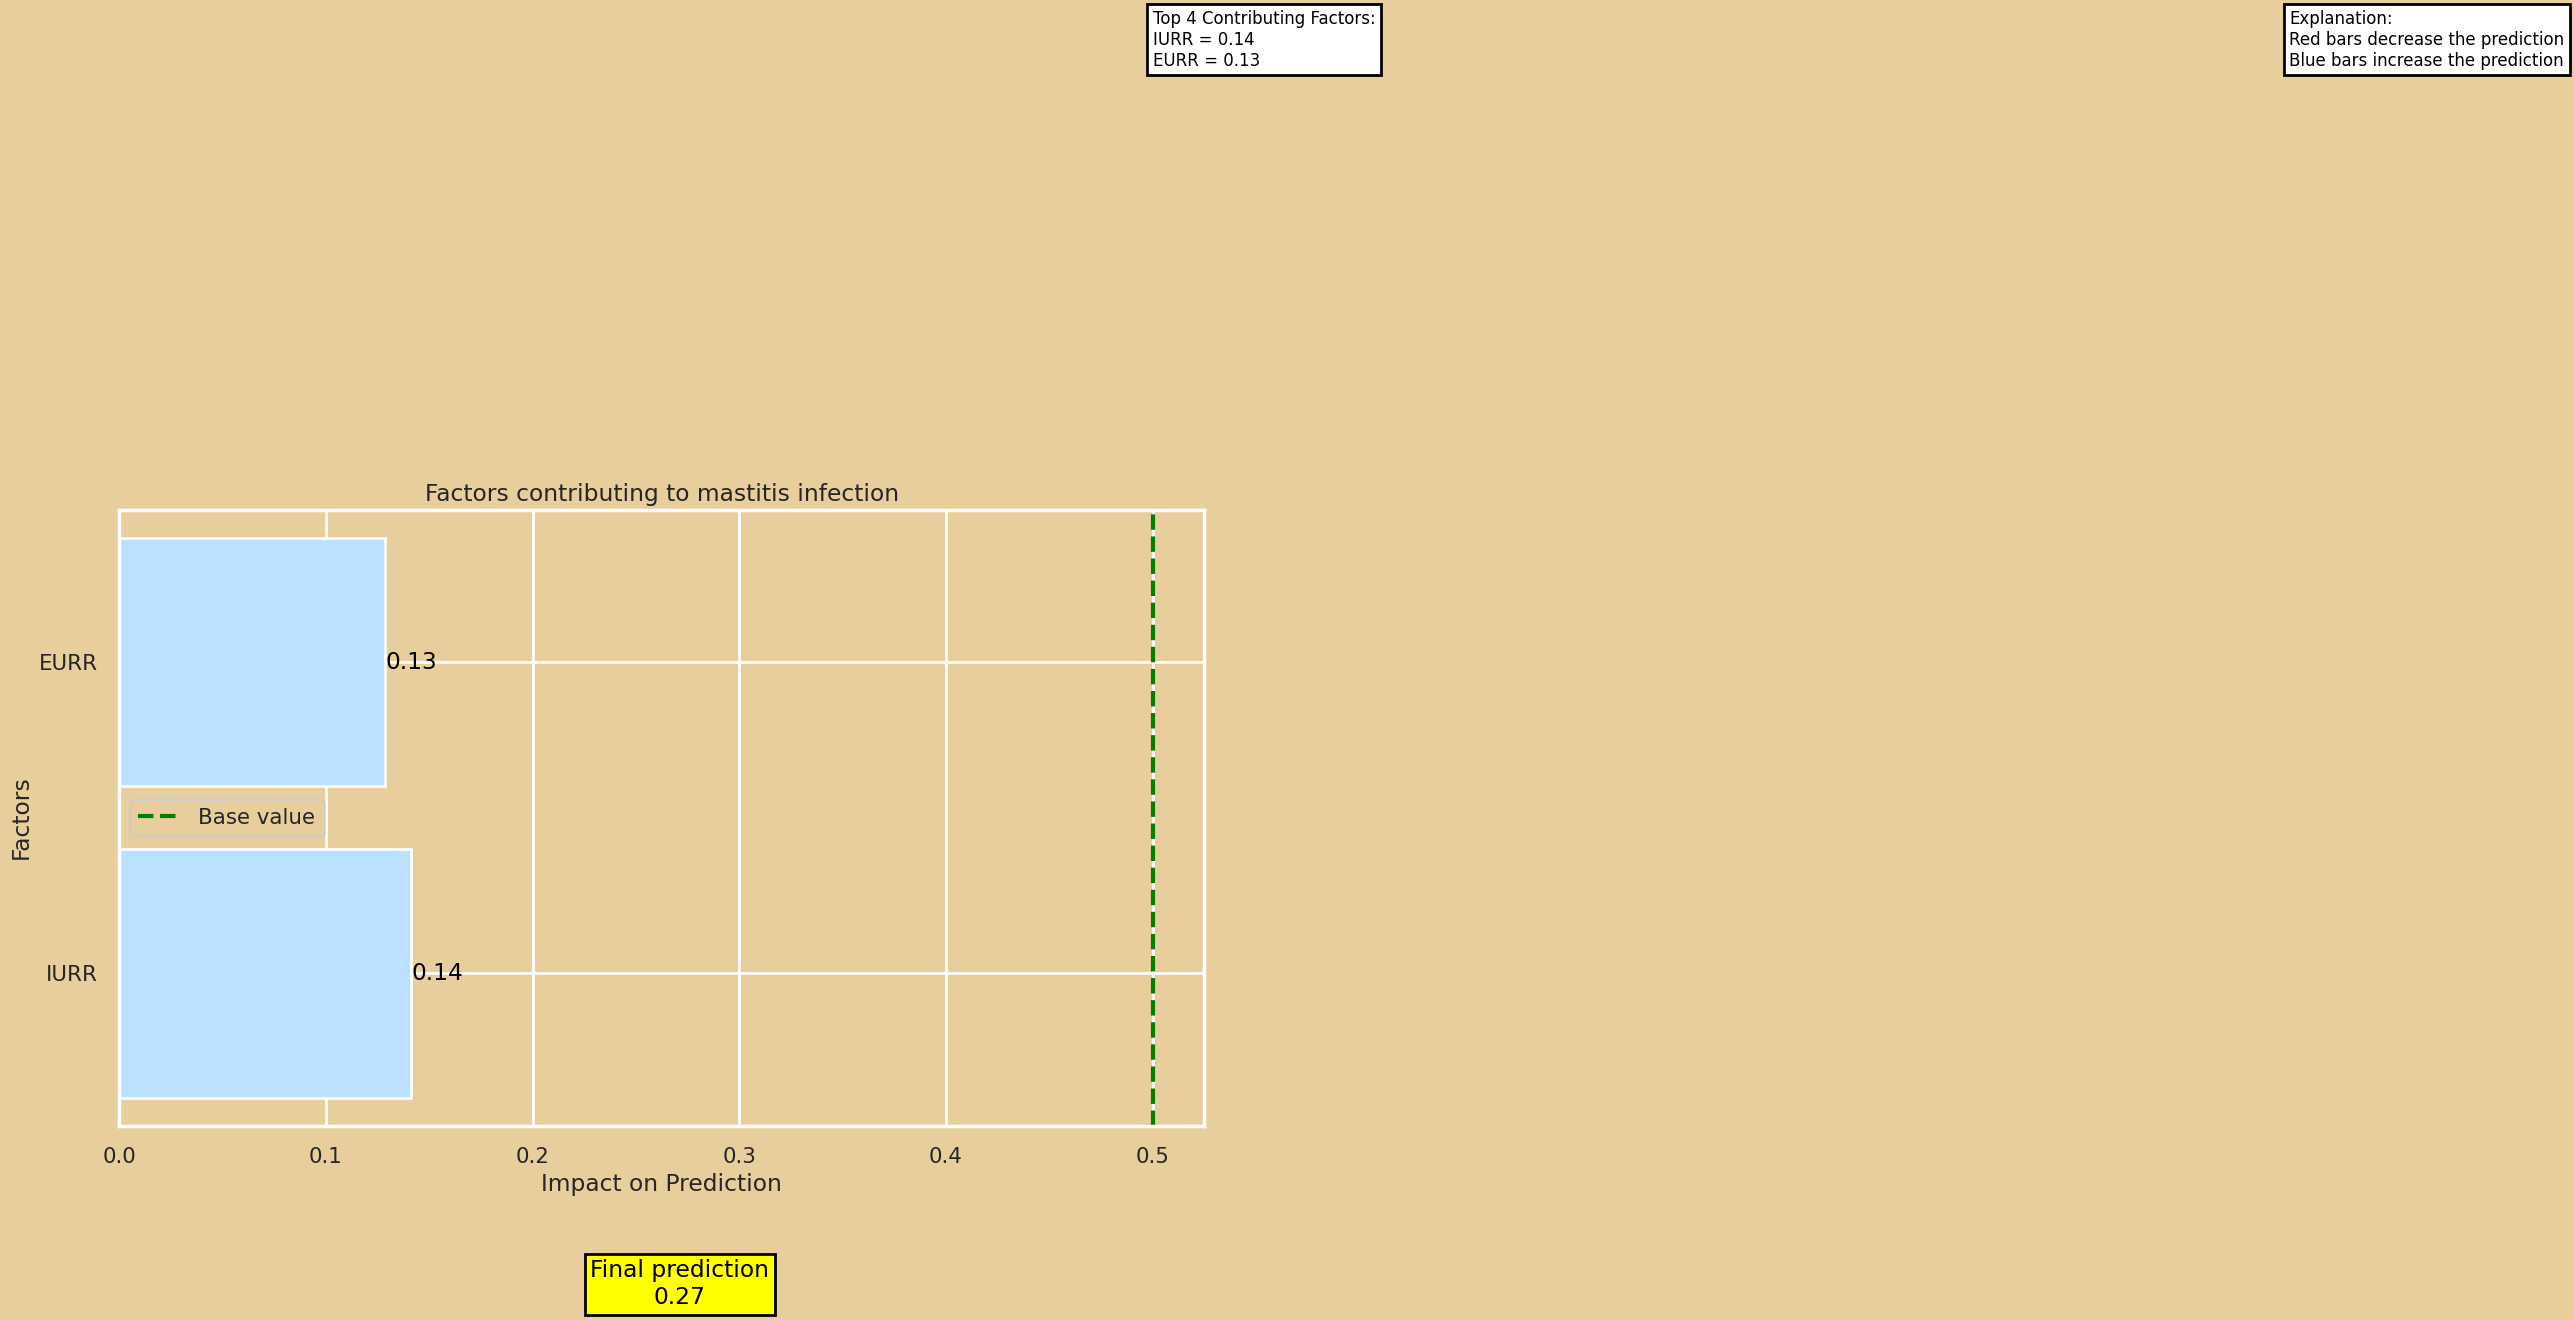

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shap_values(shap_values, feature_names, data, base_value):
    for i in range(shap_values.shape[0]):
        shap_val = shap_values[i]
        feature_vals = data[i]

        # Calculate the final prediction
        final_prediction = base_value + shap_val.sum()

        # Calculate total SHAP value
        total_shap_value = shap_val.sum()

        # Add the total SHAP value as a feature
        feature_names_with_total = feature_names + ['Total SHAP Value']
        feature_vals_with_total = np.append(feature_vals, total_shap_value)
        shap_val_with_total = np.append(shap_val, total_shap_value)

        # Sort features by absolute SHAP value
        sorted_indices = np.argsort(np.abs(shap_val_with_total))[::-1]
        sorted_shap_val = shap_val_with_total[sorted_indices]
        sorted_feature_vals = feature_vals_with_total[sorted_indices]
        sorted_feature_names = np.array(feature_names_with_total)[sorted_indices]

        # Only keep positive SHAP values for contributing factors
        positive_indices = sorted_shap_val > 0
        sorted_shap_val = sorted_shap_val[positive_indices]
        sorted_feature_vals = sorted_feature_vals[positive_indices]
        sorted_feature_names = sorted_feature_names[positive_indices]

        # Colors for the bars
        colors = ['#FFB3BA' if val < 0 else '#BAE1FF' for val in sorted_shap_val]
        highlight_colors = ['#FF6666' if val < 0 else '#6699FF' for val in sorted_shap_val]

        # Create the plot
        plt.figure(figsize=(14, 8))
        bars = plt.barh(np.arange(len(sorted_shap_val)), sorted_shap_val, color=colors)

        # Add base value line
        plt.axvline(base_value, color='green', linestyle='--', label='Base value')

        # Add SHAP value annotations
        for bar, val in zip(bars, sorted_shap_val):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', 
                     va='center', ha='left' if val > 0 else 'right', color='black')

        # Add feature value annotations on y-axis
        plt.yticks(np.arange(len(sorted_shap_val)), 
                   [f"{name}" for name in sorted_feature_names])

        # Explanation text
        plt.text(1.05, len(sorted_shap_val) + 1, 'Explanation:\nRed bars decrease the prediction\nBlue bars increase the prediction',
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Highlight the highest contributing factor
        max_shap_value = max(sorted_shap_val[:-1], key=abs)
        max_feature_index = np.argmax(sorted_shap_val[:-1] == max_shap_value)
        #plt.annotate('Highest Contributing Factor',xy=(max_shap_value, max_feature_index),xytext=(max_shap_value + 0.1, max_feature_index),arrowprops=dict(facecolor='yellow', shrink=0.05),fontsize=12, color='blue', ha='left')

        # Add the final prediction as an annotation
        plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', va='center', ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

        # Add top contributing factors
        top_contributors = "\n".join([f"{name} = {value:.2f}" for name, value in zip(sorted_feature_names[:4], sorted_shap_val[:4])])
        plt.text(0.5, len(sorted_shap_val) + 1, f'Top 4 Contributing Factors:\n{top_contributors}', 
                 va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

        # Set labels and title
        plt.xlabel('Impact on Prediction')
        plt.ylabel('Factors')
        plt.title('Factors contributing to mastitis infection')
        plt.legend()
        plt.show()

# Example data from your SHAP values
shap_values = np.array([[ 0.01510528,  0.04828333,  0.04745795,  0.0683805 ,  0.        ,
                          0.02094104, -0.04792082, -0.22217445, -0.19293541,  0.03399702],
                        [ 0.        , -0.1430172 , -0.10096483, -0.16180499, -0.06112457,
                         -0.03054825,  0.        ,  0.15355836,  0.11505941,  0.        ],
                        [ 0.        ,  0.50547092,  0.19335936,  0.        , -0.02350016,
                          0.        ,  0.04487755, -0.08090614, -0.08359505,  0.        ],
                        [-0.00980605, -0.03035921, -0.02442409,  0.36607249,  0.11960096,
                         -0.01752507,  0.03068465,  0.06951556,  0.08468532,  0.        ],
                        [ 0.        , -0.11724626, -0.13015154, -0.17281645, -0.04606187,
                         -0.0326407 ,  0.        ,  0.14133451,  0.12875644,  0.        ]])

# Feature names from your data
feature_names = ['Months_after_giving_birth', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 
                 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature']

# Corresponding feature values for the examples
data = np.array([[  1, 159, 182, 304, 354, 155, 184, 160, 185,  49],
                 [  6, 151, 189, 302, 364, 155, 187, 160, 192,  49],
                 [  3, 161, 185, 302, 364, 157, 190, 157, 189,  49],
                 [  1, 304, 354, 154, 174, 151, 171, 153, 173,  47],
                 [  4, 321, 364, 157, 189, 156, 187, 154, 183,  52]])

# Base value for SHAP calculations (example)
base_value = 0.5

plot_shap_values(shap_values, feature_names, data, base_value)
